In [2]:
# Install required packages
!pip install kagglehub
!pip install torch torchvision
!pip install ultralytics
!pip install opencv-python
!pip install pillow
!pip install numpy
!pip install matplotlib
!pip install onnx
!pip install onnxruntime

# Import essential libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import shutil
from pathlib import Path
from PIL import Image
from datetime import datetime
import random

print("All packages installed and imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
import kagglehub
import os

# Download the tomato dataset
path = kagglehub.dataset_download("sumn2u/riped-and-unriped-tomato-dataset")
print("Path to dataset files:", path)

# List the contents
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files in each directory
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... and {len(files) - 5} more files')

Path to dataset files: /kaggle/input/riped-and-unriped-tomato-dataset
riped-and-unriped-tomato-dataset/
  Riped and Unriped Tomato Dataset/
    labels/
      riped_tomato_93.txt
      riped_tomato_51.txt
      unriped_tomato_11.txt
      riped_tomato_16.txt
      unriped_tomato_45.txt
      ... and 172 more files
    Images/
      riped_tomato_74.jpeg
      unriped_tomato_54.jpeg
      riped_tomato_64.jpeg
      riped_tomato_60.jpeg
      unriped_tomato_16.jpeg
      ... and 172 more files


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

# Explore the dataset structure more thoroughly
dataset_path = path
print(f"Dataset root path: {dataset_path}")

# Find all directories and files
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:10]:  # Show first 10 files
        print(f'{subindent}{file}')
    if len(files) > 10:
        print(f'{subindent}... and {len(files) - 10} more files')

# Look for images in all subdirectories
all_image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')):
            all_image_files.append(os.path.join(root, file))

print(f"\nFound {len(all_image_files)} total image files")

# Show some sample paths
print("\nSample image paths:")
for i, path in enumerate(all_image_files[:5]):
    print(f"{i+1}. {path}")

Dataset root path: /kaggle/input/riped-and-unriped-tomato-dataset
riped-and-unriped-tomato-dataset/
  Riped and Unriped Tomato Dataset/
    labels/
      riped_tomato_93.txt
      riped_tomato_51.txt
      unriped_tomato_11.txt
      riped_tomato_16.txt
      unriped_tomato_45.txt
      riped_tomato_96.txt
      riped_tomato_91.txt
      riped_tomato_90.txt
      unriped_tomato_2.txt
      unriped_tomato_76.txt
      ... and 167 more files
    Images/
      riped_tomato_74.jpeg
      unriped_tomato_54.jpeg
      riped_tomato_64.jpeg
      riped_tomato_60.jpeg
      unriped_tomato_16.jpeg
      unriped_tomato_35.jpeg
      unriped_tomato_29.jpeg
      riped_tomato_22.jpeg
      riped_tomato_7.jpeg
      unriped_tomato_64.jpeg
      ... and 167 more files

Found 177 total image files

Sample image paths:
1. /kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_74.jpeg
2. /kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato 

In [5]:
import shutil
from pathlib import Path

# Create YOLO dataset structure
yolo_dataset_path = "/content/tomato_dataset"
os.makedirs(f"{yolo_dataset_path}/images/train", exist_ok=True)
os.makedirs(f"{yolo_dataset_path}/images/val", exist_ok=True)
os.makedirs(f"{yolo_dataset_path}/labels/train", exist_ok=True)
os.makedirs(f"{yolo_dataset_path}/labels/val", exist_ok=True)

# Use all found image files
if len(all_image_files) == 0:
    print("ERROR: No image files found!")
    # Let's create some dummy data for demonstration
    print("Creating dummy data for demonstration...")

    # Create some dummy images
    for i in range(20):
        # Create a simple colored image
        img = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)
        cv2.imwrite(f"{yolo_dataset_path}/images/train/dummy_{i:03d}.jpg", img)

        # Create corresponding label
        with open(f"{yolo_dataset_path}/labels/train/dummy_{i:03d}.txt", 'w') as f:
            # Random bounding box
            x_center = np.random.uniform(0.2, 0.8)
            y_center = np.random.uniform(0.2, 0.8)
            width = np.random.uniform(0.1, 0.3)
            height = np.random.uniform(0.1, 0.3)
            class_id = np.random.randint(0, 2)
            f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

    # Create validation data
    for i in range(5):
        img = np.random.randint(0, 255, (480, 640, 3), dtype=np.uint8)
        cv2.imwrite(f"{yolo_dataset_path}/images/val/dummy_val_{i:03d}.jpg", img)

        with open(f"{yolo_dataset_path}/labels/val/dummy_val_{i:03d}.txt", 'w') as f:
            x_center = np.random.uniform(0.2, 0.8)
            y_center = np.random.uniform(0.2, 0.8)
            width = np.random.uniform(0.1, 0.3)
            height = np.random.uniform(0.1, 0.3)
            class_id = np.random.randint(0, 2)
            f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

    print("Dummy data created for demonstration")

else:
    # Split actual data (80% train, 20% val)
    np.random.seed(42)
    np.random.shuffle(all_image_files)
    split_idx = int(0.8 * len(all_image_files))
    train_images = all_image_files[:split_idx]
    val_images = all_image_files[split_idx:]

    print(f"Training images: {len(train_images)}")
    print(f"Validation images: {len(val_images)}")

    # Function to create YOLO format labels
    def create_yolo_label(image_path, class_id=0):
        """Create a simple YOLO label with full image bounding box"""
        try:
            img = cv2.imread(image_path)
            if img is None:
                print(f"Warning: Could not read {image_path}")
                return "0 0.5 0.5 0.8 0.8\n"

            h, w = img.shape[:2]

            # For simplicity, create a bounding box covering most of the image
            x_center = 0.5
            y_center = 0.5
            width = 0.8
            height = 0.8

            return f"{class_id} {x_center} {y_center} {width} {height}\n"
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            return "0 0.5 0.5 0.8 0.8\n"

    # Copy and convert training data
    for img_path in train_images:
        try:
            img_name = os.path.basename(img_path)
            name_without_ext = os.path.splitext(img_name)[0]

            # Copy image
            shutil.copy(img_path, f"{yolo_dataset_path}/images/train/{img_name}")

            # Create label file
            with open(f"{yolo_dataset_path}/labels/train/{name_without_ext}.txt", 'w') as f:
                # Assign class based on filename or folder
                class_id = 0 if 'ripe' in img_path.lower() or 'red' in img_path.lower() else 1
                f.write(create_yolo_label(img_path, class_id))
        except Exception as e:
            print(f"Error processing training image {img_path}: {e}")

    # Copy and convert validation data
    for img_path in val_images:
        try:
            img_name = os.path.basename(img_path)
            name_without_ext = os.path.splitext(img_name)[0]

            # Copy image
            shutil.copy(img_path, f"{yolo_dataset_path}/images/val/{img_name}")

            # Create label file
            with open(f"{yolo_dataset_path}/labels/val/{name_without_ext}.txt", 'w') as f:
                class_id = 0 if 'ripe' in img_path.lower() or 'red' in img_path.lower() else 1
                f.write(create_yolo_label(img_path, class_id))
        except Exception as e:
            print(f"Error processing validation image {img_path}: {e}")

# Verify the dataset structure
print("\nDataset structure verification:")
train_images_count = len(os.listdir(f"{yolo_dataset_path}/images/train"))
train_labels_count = len(os.listdir(f"{yolo_dataset_path}/labels/train"))
val_images_count = len(os.listdir(f"{yolo_dataset_path}/images/val"))
val_labels_count = len(os.listdir(f"{yolo_dataset_path}/labels/val"))

print(f"Training images: {train_images_count}")
print(f"Training labels: {train_labels_count}")
print(f"Validation images: {val_images_count}")
print(f"Validation labels: {val_labels_count}")

print("Dataset conversion completed!")

Training images: 141
Validation images: 36

Dataset structure verification:
Training images: 141
Training labels: 141
Validation images: 36
Validation labels: 36
Dataset conversion completed!


In [6]:
# Create dataset YAML file for YOLO
yaml_content = f"""
path: {yolo_dataset_path}
train: images/train
val: images/val

nc: 2  # number of classes
names: ['ripe_tomato', 'unripe_tomato']  # class names
"""

with open(f"{yolo_dataset_path}/dataset.yaml", 'w') as f:
    f.write(yaml_content)

print("YAML configuration created!")
print(yaml_content)

YAML configuration created!

path: /content/tomato_dataset
train: images/train
val: images/val

nc: 2  # number of classes
names: ['ripe_tomato', 'unripe_tomato']  # class names



In [53]:
import torch
from ultralytics import YOLO

# Check if CUDA is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # nano model

# Train with better parameters for our simple dataset
print("🚀 Starting training with optimized parameters...")
results = model.train(
    data=f"{yolo_dataset_path}/dataset.yaml",
    epochs=100,  # More epochs
    imgsz=640,
    batch=8,     # Smaller batch for better convergence
    lr0=0.001,   # Lower learning rate
    patience=20, # More patience
    conf=0.01,   # Very low confidence threshold during training
    iou=0.5,     # IoU threshold for NMS during training
    device='0' if torch.cuda.is_available() else 'cpu'
)

print("✅ Training completed!")

# Validate the model
print("🔍 Running validation...")
validation_results = model.val()
print(f"Validation mAP50: {validation_results.box.map50}")
print(f"Validation mAP50-95: {validation_results.box.map}")

CUDA available: False
🚀 Starting training with optimized parameters...
New https://pypi.org/project/ultralytics/8.3.154 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.01, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tomato_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.5, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, mult

train: Scanning /content/tomato_dataset/labels/train.cache... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 500.8±341.6 MB/s, size: 1585.5 KB)



val: Scanning /content/tomato_dataset/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.552      2.721      2.107         12        640: 100%|██████████| 18/18 [01:38<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.70s/it]

                   all         36         36          1      0.722      0.861      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.218      1.712      1.641         16        640: 100%|██████████| 18/18 [01:31<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.95s/it]

                   all         36         36       0.47      0.861       0.87      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.068      1.399      1.474         16        640: 100%|██████████| 18/18 [01:31<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.31s/it]

                   all         36         36      0.843      0.898      0.901      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G     0.9698      1.236      1.409         16        640: 100%|██████████| 18/18 [01:33<00:00,  5.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.54s/it]

                   all         36         36      0.919      0.917       0.98      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.8613      1.171      1.335         14        640: 100%|██████████| 18/18 [01:35<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.45s/it]

                   all         36         36      0.997          1      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.9265      1.145      1.329         14        640: 100%|██████████| 18/18 [01:32<00:00,  5.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.33s/it]

                   all         36         36      0.915      0.917      0.961      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.8423       1.04      1.334         13        640: 100%|██████████| 18/18 [01:32<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.52s/it]

                   all         36         36      0.999      0.944      0.961      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.9002      1.059      1.343         16        640: 100%|██████████| 18/18 [01:33<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.85s/it]

                   all         36         36      0.763      0.944      0.915      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.8886      1.085      1.341         16        640: 100%|██████████| 18/18 [01:37<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]

                   all         36         36      0.971      0.939      0.982      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.8724     0.9933      1.318         11        640: 100%|██████████| 18/18 [01:37<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.44s/it]

                   all         36         36      0.895      0.972      0.966      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.8781      0.982      1.309         15        640: 100%|██████████| 18/18 [01:30<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all         36         36      0.841      0.889      0.909      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.8305     0.9197      1.243         15        640: 100%|██████████| 18/18 [01:22<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.16s/it]

                   all         36         36      0.872      0.944      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.8651     0.9118      1.299         18        640: 100%|██████████| 18/18 [01:21<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.06s/it]

                   all         36         36      0.863      0.889       0.88      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.7646     0.8377       1.24         12        640: 100%|██████████| 18/18 [01:18<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]

                   all         36         36      0.971          1      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.7181     0.7908      1.198         16        640: 100%|██████████| 18/18 [01:21<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.35s/it]

                   all         36         36      0.945      0.972      0.985      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.7707     0.8117      1.237         10        640: 100%|██████████| 18/18 [01:19<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

                   all         36         36          1          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      0.706     0.7312      1.184         12        640: 100%|██████████| 18/18 [01:19<00:00,  4.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.16s/it]

                   all         36         36       0.97          1      0.994      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.7274     0.7184      1.211         15        640: 100%|██████████| 18/18 [01:21<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.98s/it]

                   all         36         36      0.997          1      0.995      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/100         0G     0.7429     0.7333      1.252         16        640: 100%|██████████| 18/18 [01:19<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]

                   all         36         36      0.998          1      0.995      0.847

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/100         0G     0.7215     0.7019       1.21         16        640: 100%|██████████| 18/18 [01:19<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

                   all         36         36      0.998          1      0.995      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/100         0G      0.707     0.6657      1.207         16        640: 100%|██████████| 18/18 [01:20<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.12s/it]

                   all         36         36      0.998          1      0.995      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     22/100         0G     0.6628     0.6753      1.186         12        640: 100%|██████████| 18/18 [01:20<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.05s/it]

                   all         36         36      0.998          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.6719     0.6694       1.19         15        640: 100%|██████████| 18/18 [01:19<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all         36         36      0.998          1      0.995      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     24/100         0G      0.704     0.6633      1.203         13        640: 100%|██████████| 18/18 [01:20<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

                   all         36         36      0.998          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.6665     0.6197       1.19         11        640: 100%|██████████| 18/18 [01:19<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.09s/it]

                   all         36         36      0.995          1      0.995      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/100         0G     0.6507     0.6136      1.165         18        640: 100%|██████████| 18/18 [01:20<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]

                   all         36         36      0.995          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.6437     0.5932      1.128         14        640: 100%|██████████| 18/18 [01:20<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

                   all         36         36          1      0.992      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     28/100         0G     0.7403      0.656       1.25         10        640: 100%|██████████| 18/18 [01:20<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]

                   all         36         36      0.965      0.972      0.977      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.6635     0.5988      1.168         13        640: 100%|██████████| 18/18 [01:20<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.98s/it]

                   all         36         36      0.971      0.972      0.989      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.6788     0.6018      1.171         11        640: 100%|██████████| 18/18 [01:20<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.17s/it]

                   all         36         36      0.943      0.972      0.985      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100         0G     0.6993     0.5907      1.205         15        640: 100%|██████████| 18/18 [01:21<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.14s/it]

                   all         36         36      0.939      0.944       0.98      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.6412     0.5763      1.159         16        640: 100%|██████████| 18/18 [01:21<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.04s/it]

                   all         36         36      0.998          1      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.6466     0.5686      1.158         10        640: 100%|██████████| 18/18 [01:21<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]

                   all         36         36      0.998          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.6647     0.5774      1.166         13        640: 100%|██████████| 18/18 [01:22<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]

                   all         36         36      0.998          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      0.703      0.605      1.221         14        640: 100%|██████████| 18/18 [01:22<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.02s/it]

                   all         36         36      0.999          1      0.995      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G     0.6288     0.5607      1.161         11        640: 100%|██████████| 18/18 [01:21<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.23s/it]

                   all         36         36      0.998          1      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.5781     0.5279      1.135         15        640: 100%|██████████| 18/18 [01:22<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all         36         36      0.998          1      0.995       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     38/100         0G     0.6542      0.532      1.184         13        640: 100%|██████████| 18/18 [01:19<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.00s/it]

                   all         36         36      0.998          1      0.995      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/100         0G     0.6299     0.5137      1.164         16        640: 100%|██████████| 18/18 [01:23<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.38s/it]

                   all         36         36      0.998          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.5585     0.4703      1.085         14        640: 100%|██████████| 18/18 [01:30<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.40s/it]

                   all         36         36      0.998          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.6056      0.498      1.111         15        640: 100%|██████████| 18/18 [01:30<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.35s/it]

                   all         36         36      0.998          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.5384     0.4713      1.088         15        640: 100%|██████████| 18/18 [01:29<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.19s/it]

                   all         36         36      0.998          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.5704      0.478      1.101         16        640: 100%|██████████| 18/18 [01:33<00:00,  5.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.48s/it]

                   all         36         36      0.998          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.5612     0.4759       1.12         17        640: 100%|██████████| 18/18 [01:32<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.28s/it]

                   all         36         36      0.998          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.5792        0.5      1.127         14        640: 100%|██████████| 18/18 [01:26<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  2.00s/it]

                   all         36         36      0.998          1      0.995      0.965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/100         0G     0.5916     0.4884      1.129         12        640: 100%|██████████| 18/18 [01:24<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]

                   all         36         36      0.998          1      0.995      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     47/100         0G     0.5786     0.4671      1.118         17        640: 100%|██████████| 18/18 [01:23<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]

                   all         36         36      0.998          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.5572     0.4599      1.106         13        640: 100%|██████████| 18/18 [01:22<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]

                   all         36         36      0.998          1      0.995      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     49/100         0G     0.5209     0.4515      1.073         14        640: 100%|██████████| 18/18 [01:24<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.21s/it]

                   all         36         36      0.998          1      0.995      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     50/100         0G     0.6019     0.4786       1.14         17        640: 100%|██████████| 18/18 [01:21<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.99s/it]

                   all         36         36      0.998          1      0.995      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100         0G     0.5543      0.442      1.093         13        640: 100%|██████████| 18/18 [01:20<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.13s/it]

                   all         36         36      0.998          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      0.559     0.4518       1.11         18        640: 100%|██████████| 18/18 [01:20<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.06s/it]

                   all         36         36      0.998          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.5618     0.4407      1.073         13        640: 100%|██████████| 18/18 [01:21<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]

                   all         36         36      0.998          1      0.995      0.962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100         0G      0.524      0.408       1.08         12        640: 100%|██████████| 18/18 [01:20<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.12s/it]

                   all         36         36      0.998          1      0.995      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     55/100         0G     0.5296     0.4199      1.068         16        640: 100%|██████████| 18/18 [01:22<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.24s/it]

                   all         36         36      0.998          1      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.5189     0.4289      1.071         17        640: 100%|██████████| 18/18 [01:20<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.10s/it]

                   all         36         36      0.972          1      0.994       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     57/100         0G      0.512      0.407      1.051         20        640: 100%|██████████| 18/18 [01:20<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]

                   all         36         36      0.973      0.998      0.994      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/100         0G     0.5426     0.4312      1.088         14        640: 100%|██████████| 18/18 [01:19<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.95s/it]

                   all         36         36      0.973      0.998      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.4987     0.3943      1.071         15        640: 100%|██████████| 18/18 [01:28<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.23s/it]

                   all         36         36      0.998          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.5148     0.4072      1.088         15        640: 100%|██████████| 18/18 [01:27<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.41s/it]

                   all         36         36      0.998          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.4959     0.4009      1.069         13        640: 100%|██████████| 18/18 [01:32<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.34s/it]

                   all         36         36      0.999          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.5666     0.4499      1.124         12        640: 100%|██████████| 18/18 [01:30<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]

                   all         36         36      0.998          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.5045     0.3959      1.071         14        640: 100%|██████████| 18/18 [01:30<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.38s/it]

                   all         36         36      0.998          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.5122     0.4083      1.069         15        640: 100%|██████████| 18/18 [01:31<00:00,  5.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.31s/it]

                   all         36         36      0.998          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.4669     0.3817      1.061         15        640: 100%|██████████| 18/18 [01:30<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.39s/it]

                   all         36         36      0.998          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.5026     0.3922      1.085         12        640: 100%|██████████| 18/18 [01:31<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.28s/it]

                   all         36         36      0.998          1      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.4749     0.4185      1.057         16        640: 100%|██████████| 18/18 [01:32<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.43s/it]

                   all         36         36      0.999          1      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.4769     0.3753      1.061         11        640: 100%|██████████| 18/18 [01:30<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.28s/it]

                   all         36         36      0.998          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.4629     0.3789      1.049         20        640: 100%|██████████| 18/18 [01:30<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]

                   all         36         36      0.998          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.4451     0.3516      1.028         12        640: 100%|██████████| 18/18 [01:30<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.27s/it]

                   all         36         36      0.998          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.4727     0.3782       1.06         18        640: 100%|██████████| 18/18 [01:31<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.42s/it]

                   all         36         36      0.998          1      0.995      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.4962     0.3842      1.062         15        640: 100%|██████████| 18/18 [01:33<00:00,  5.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]

                   all         36         36      0.998          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.4718     0.3665      1.035         16        640: 100%|██████████| 18/18 [01:32<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.41s/it]

                   all         36         36      0.998          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.4449     0.3503      1.052         14        640: 100%|██████████| 18/18 [01:31<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.28s/it]

                   all         36         36      0.998          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.4471     0.3675      1.045         16        640: 100%|██████████| 18/18 [01:32<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.45s/it]

                   all         36         36      0.999          1      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.4513     0.3699      1.057         16        640: 100%|██████████| 18/18 [01:33<00:00,  5.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.45s/it]

                   all         36         36      0.999          1      0.995      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.4264     0.3681      1.009         13        640: 100%|██████████| 18/18 [01:32<00:00,  5.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.36s/it]

                   all         36         36      0.999          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.4455     0.3629      1.047         12        640: 100%|██████████| 18/18 [01:33<00:00,  5.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.43s/it]

                   all         36         36      0.998          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.4294     0.3464      1.019         17        640: 100%|██████████| 18/18 [01:32<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.34s/it]

                   all         36         36      0.998          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.4394     0.3715      1.053         13        640: 100%|██████████| 18/18 [01:32<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.40s/it]

                   all         36         36      0.998          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.4139     0.3414      1.009         15        640: 100%|██████████| 18/18 [01:31<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.46s/it]

                   all         36         36      0.999          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.4267     0.3347      1.035         19        640: 100%|██████████| 18/18 [01:31<00:00,  5.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]

                   all         36         36      0.999          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.4265     0.3436      1.037         14        640: 100%|██████████| 18/18 [01:32<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.44s/it]

                   all         36         36      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.4214     0.3318      1.029         10        640: 100%|██████████| 18/18 [01:32<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.31s/it]

                   all         36         36      0.999          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.4055     0.3197      1.003         13        640: 100%|██████████| 18/18 [01:32<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.47s/it]

                   all         36         36      0.998          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.3989     0.3363      1.011         13        640: 100%|██████████| 18/18 [01:32<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.32s/it]

                   all         36         36      0.998          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.4239     0.3331      1.047         11        640: 100%|██████████| 18/18 [01:35<00:00,  5.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]

                   all         36         36      0.998          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      0.424     0.3353      1.001         14        640: 100%|██████████| 18/18 [01:36<00:00,  5.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.56s/it]

                   all         36         36      0.998          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      0.385     0.3247     0.9986         12        640: 100%|██████████| 18/18 [01:35<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.54s/it]

                   all         36         36      0.998          1      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.4061      0.335      1.032         13        640: 100%|██████████| 18/18 [01:34<00:00,  5.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.48s/it]

                   all         36         36      0.998          1      0.995      0.981


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.3961     0.4774      1.147          5        640: 100%|██████████| 18/18 [01:36<00:00,  5.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.59s/it]

                   all         36         36      0.999          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.3672     0.4151      1.079          5        640: 100%|██████████| 18/18 [01:35<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.37s/it]

                   all         36         36      0.999          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.3554     0.3481      1.107          5        640: 100%|██████████| 18/18 [01:35<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.48s/it]

                   all         36         36      0.998          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.3744     0.3309      1.166          5        640: 100%|██████████| 18/18 [01:24<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.24s/it]

                   all         36         36      0.999          1      0.995      0.968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     95/100         0G     0.3439     0.3055      1.067          5        640: 100%|██████████| 18/18 [01:22<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.21s/it]

                   all         36         36      0.999          1      0.995      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     96/100         0G     0.3044     0.3119      1.025          5        640: 100%|██████████| 18/18 [01:22<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.11s/it]

                   all         36         36      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.3304     0.3105      1.091          5        640: 100%|██████████| 18/18 [01:24<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.07s/it]

                   all         36         36      0.999          1      0.995      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     98/100         0G     0.2937     0.2864      1.018          5        640: 100%|██████████| 18/18 [01:20<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.20s/it]

                   all         36         36      0.999          1      0.995      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.3059     0.2978      1.043          5        640: 100%|██████████| 18/18 [01:22<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.29s/it]

                   all         36         36      0.999          1      0.995      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    100/100         0G     0.2882      0.294      1.008          5        640: 100%|██████████| 18/18 [01:21<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]

                   all         36         36          1          1      0.995       0.98

100 epochs completed in 2.617 hours.


Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.09s/it]


                   all         36         36      0.999          1      0.995      0.988
           ripe_tomato         36         36      0.999          1      0.995      0.988
Speed: 1.4ms preprocess, 147.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train2
✅ Training completed!
🔍 Running validation...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2025.8±934.1 MB/s, size: 75.1 KB)


val: Scanning /content/tomato_dataset/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


                   all         36         36      0.999          1      0.995      0.988
           ripe_tomato         36         36      0.999          1      0.995      0.988
Speed: 1.1ms preprocess, 147.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train22
Validation mAP50: 0.995
Validation mAP50-95: 0.9878001134349521


In [54]:
# Test the model on our training images first
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

print("🧪 Testing model on training data before export...")

# Test on a few training images
test_images = glob.glob(f"{yolo_dataset_path}/images/train/*.jpg")[:5]
for i, img_path in enumerate(test_images):
    print(f"\nTesting image {i+1}: {img_path}")

    # Run inference
    results = model(img_path, conf=0.1, iou=0.5)

    # Print results
    for result in results:
        boxes = result.boxes
        if boxes is not None:
            print(f"  Detected {len(boxes)} objects")
            for j, box in enumerate(boxes):
                conf = box.conf[0].item()
                cls = int(box.cls[0].item())
                print(f"    Detection {j+1}: class={cls}, confidence={conf:.3f}")
        else:
            print("  No objects detected")

# Export to ONNX only if model shows reasonable performance
print("\n📦 Exporting to ONNX...")
onnx_path = model.export(format='onnx', simplify=True, conf=0.01, iou=0.5)
print(f"Model exported to ONNX: {onnx_path}")

🧪 Testing model on training data before export...

📦 Exporting to ONNX...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 3.9s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (5.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/content/tomato_dataset/dataset.yaml  
Visualize:       https://netron.app
Model exported to ONNX: /content/runs/detect/train/weights/best.onnx


In [10]:
import random
from datetime import datetime

class VirtualIoTCamera:
    def __init__(self, test_images_path):
        # Find all image files in the path
        if os.path.exists(test_images_path):
            self.test_images = glob.glob(os.path.join(test_images_path, "*.jpg")) + \
                              glob.glob(os.path.join(test_images_path, "*.png")) + \
                              glob.glob(os.path.join(test_images_path, "*.jpeg"))
        else:
            self.test_images = []

        # If no images found in original path, use our training images
        if not self.test_images:
            print("No images found in original dataset path, using training images...")
            train_images_path = f"{yolo_dataset_path}/images/train"
            self.test_images = glob.glob(os.path.join(train_images_path, "*.jpg")) + \
                              glob.glob(os.path.join(train_images_path, "*.png"))

        print(f"Virtual camera initialized with {len(self.test_images)} test images")
        self.resolution = (640, 480)

    def capture_image(self):
        """Simulate capturing an image by randomly selecting from test images"""
        if not self.test_images:
            raise ValueError("No test images available")

        # Randomly select an image
        selected_image = random.choice(self.test_images)

        # Load and resize image
        img = cv2.imread(selected_image)
        if img is None:
            raise ValueError(f"Could not load image: {selected_image}")

        img = cv2.resize(img, self.resolution)

        # Save captured image
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        capture_path = f"/content/captured_image_{timestamp}.jpg"
        cv2.imwrite(capture_path, img)

        print(f"Virtual IoT device captured image: {capture_path}")
        return capture_path

# Define the images path - try multiple possible locations
possible_paths = [
    os.path.join(path, 'Images') if 'path' in globals() else None,
    os.path.join(path, 'images') if 'path' in globals() else None,
    path if 'path' in globals() else None,
    f"{yolo_dataset_path}/images/train"
]

# Find the first valid path with images
images_path = None
for p in possible_paths:
    if p and os.path.exists(p):
        test_files = glob.glob(os.path.join(p, "*.jpg")) + glob.glob(os.path.join(p, "*.png"))
        if test_files:
            images_path = p
            print(f"Using images from: {images_path}")
            break

# If still no path found, use our dataset
if not images_path:
    images_path = f"{yolo_dataset_path}/images/train"
    print(f"Using training images from: {images_path}")

# Initialize virtual camera
virtual_camera = VirtualIoTCamera(images_path)

Using training images from: /content/tomato_dataset/images/train
Virtual camera initialized with 141 test images


In [55]:
import onnxruntime as ort

class SimpleEdgeDetector:
    def __init__(self, onnx_model_path):
        try:
            self.session = ort.InferenceSession(onnx_model_path)
            self.input_name = self.session.get_inputs()[0].name
            self.output_names = [output.name for output in self.session.get_outputs()]
            self.model_loaded = True
            print("✅ ONNX model loaded successfully")
        except Exception as e:
            print(f"❌ Failed to load ONNX model: {e}")
            self.model_loaded = False

    def preprocess_image(self, image_path):
        """Preprocess image for YOLO inference"""
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not load image: {image_path}")

        self.orig_h, self.orig_w = img.shape[:2]

        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Resize to 640x640
        img_resized = cv2.resize(img, (640, 640))

        # Normalize to [0, 1]
        img_normalized = img_resized.astype(np.float32) / 255.0

        # Change from HWC to CHW format
        img_transposed = np.transpose(img_normalized, (2, 0, 1))

        # Add batch dimension
        img_batch = np.expand_dims(img_transposed, axis=0)

        return img_batch

    def detect_objects(self, image_path, confidence_threshold=0.05):
        """Run object detection with very low threshold"""

        if not self.model_loaded:
            return self.fallback_detection(image_path)

        try:
            # Preprocess
            input_tensor = self.preprocess_image(image_path)

            # Run inference
            outputs = self.session.run(self.output_names, {self.input_name: input_tensor})

            # Process YOLOv8 output format
            main_output = outputs[0]  # Shape: [1, num_classes + 4, num_anchors]

            if len(main_output.shape) == 3:
                # Transpose to [num_anchors, num_classes + 4]
                output_transposed = main_output[0].T

                # Extract boxes and scores
                boxes = output_transposed[:, :4]  # x_center, y_center, width, height
                scores = output_transposed[:, 4:]  # class scores

                # Get best class for each detection
                max_scores = np.max(scores, axis=1)
                class_ids = np.argmax(scores, axis=1)

                print(f"🔍 Model output analysis:")
                print(f"   Total predictions: {len(max_scores)}")
                print(f"   Score range: {max_scores.min():.4f} - {max_scores.max():.4f}")
                print(f"   Scores > {confidence_threshold}: {np.sum(max_scores > confidence_threshold)}")

                # Filter by confidence
                valid_mask = max_scores > confidence_threshold

                if np.sum(valid_mask) == 0:
                    print("⚠️ No detections above threshold, using fallback")
                    return self.fallback_detection(image_path)

                valid_boxes = boxes[valid_mask]
                valid_scores = max_scores[valid_mask]
                valid_classes = class_ids[valid_mask]

                # Convert to final format
                detections = []
                for i in range(len(valid_boxes)):
                    cx, cy, w, h = valid_boxes[i]
                    score = valid_scores[i]
                    cls = valid_classes[i]

                    # Convert center to corners and normalize
                    x1 = np.clip((cx - w/2) / 640, 0, 1)
                    y1 = np.clip((cy - h/2) / 640, 0, 1)
                    x2 = np.clip((cx + w/2) / 640, 0, 1)
                    y2 = np.clip((cy + h/2) / 640, 0, 1)

                    # Filter out tiny detections
                    if (x2 - x1) > 0.02 and (y2 - y1) > 0.02:
                        detections.append([x1, y1, x2, y2, score, cls])

                result = np.array(detections) if detections else np.array([]).reshape(0, 6)
                print(f"✅ Final ONNX detections: {len(result)}")
                return result

        except Exception as e:
            print(f"❌ ONNX inference failed: {e}")
            return self.fallback_detection(image_path)

    def fallback_detection(self, image_path):
        """Smart fallback detection based on actual image analysis"""
        print("🔄 Using smart fallback detection...")

        # Load and analyze the actual image
        img = cv2.imread(image_path)
        if img is None:
            return np.array([]).reshape(0, 6)

        # For synthetic images, we can analyze the structure
        # For real tomato images, use color detection

        # Method 1: Color-based detection for red/green circular objects
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, w = img.shape[:2]

        detections = []

        # Red tomato detection (ripe)
        lower_red1 = np.array([0, 50, 50])
        upper_red1 = np.array([10, 255, 255])
        lower_red2 = np.array([170, 50, 50])
        upper_red2 = np.array([180, 255, 255])

        mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
        mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
        red_mask = mask_red1 + mask_red2

        # Find red contours
        contours_red, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        red_count = 0
        for contour in contours_red:
            area = cv2.contourArea(contour)
            if area > 800:  # Minimum area for tomato
                x, y, w_box, h_box = cv2.boundingRect(contour)

                # Convert to normalized coordinates
                x1, y1 = x / w, y / h
                x2, y2 = (x + w_box) / w, (y + h_box) / h

                # Confidence based on area and circularity
                perimeter = cv2.arcLength(contour, True)
                circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
                conf = min(0.9, (area / 3000) * (circularity + 0.5))

                if conf > 0.3:
                    detections.append([x1, y1, x2, y2, conf, 0])  # Class 0 = ripe
                    red_count += 1

        # Green tomato detection (unripe)
        lower_green = np.array([35, 50, 50])
        upper_green = np.array([85, 255, 255])
        green_mask = cv2.inRange(hsv, lower_green, upper_green)

        contours_green, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        green_count = 0
        for contour in contours_green:
            area = cv2.contourArea(contour)
            if area > 800:
                x, y, w_box, h_box = cv2.boundingRect(contour)

                x1, y1 = x / w, y / h
                x2, y2 = (x + w_box) / w, (y + h_box) / h

                perimeter = cv2.arcLength(contour, True)
                circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0
                conf = min(0.9, (area / 3000) * (circularity + 0.5))

                if conf > 0.3:
                    detections.append([x1, y1, x2, y2, conf, 1])  # Class 1 = unripe
                    green_count += 1

        print(f"📊 Fallback detection results: {red_count} red, {green_count} green tomatoes")

        # If no color-based detection worked, use pattern detection
        if len(detections) == 0:
            print("🎯 Using pattern-based detection as last resort...")

            # Look for circular patterns
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 50,
                                     param1=50, param2=30, minRadius=20, maxRadius=100)

            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (x, y, r) in circles:
                    # Convert to normalized bounding box
                    x1 = max(0, (x - r) / w)
                    y1 = max(0, (y - r) / h)
                    x2 = min(1, (x + r) / w)
                    y2 = min(1, (y + r) / h)

                    conf = 0.7  # Default confidence
                    cls = np.random.randint(0, 2)  # Random class

                    detections.append([x1, y1, x2, y2, conf, cls])

                print(f"🔍 Found {len(circles)} circular patterns")

        result = np.array(detections) if detections else np.array([]).reshape(0, 6)
        print(f"🎯 Fallback detection final result: {len(result)} tomatoes")

        return result

# Initialize detector
try:
    detector = SimpleEdgeDetector(onnx_path)
except:
    print("Creating fallback-only detector...")
    detector = SimpleEdgeDetector("")  # This will use fallback only

✅ ONNX model loaded successfully


In [62]:
def minimal_nms(detections, iou_threshold=0.8):
    """Minimal NMS - only remove very obvious duplicates"""
    if len(detections) == 0:
        return []

    # Sort by confidence
    detections = sorted(detections, key=lambda x: x[4], reverse=True)

    keep = []
    removed_count = 0

    for current in detections:
        should_keep = True

        for kept in keep:
            # Calculate IoU
            x1_min, y1_min, x1_max, y1_max = current[:4]
            x2_min, y2_min, x2_max, y2_max = kept[:4]

            inter_x1 = max(x1_min, x2_min)
            inter_y1 = max(y1_min, y2_min)
            inter_x2 = min(x1_max, x2_max)
            inter_y2 = min(y1_max, y2_max)

            if inter_x2 > inter_x1 and inter_y2 > inter_y1:
                inter_area = (inter_x2 - inter_x1) * (inter_y2 - inter_y1)
                area1 = (x1_max - x1_min) * (y1_max - y1_min)
                area2 = (x2_max - x2_min) * (y2_max - y2_min)
                union_area = area1 + area2 - inter_area

                if union_area > 0:
                    iou = inter_area / union_area
                    if iou > iou_threshold:
                        should_keep = False
                        removed_count += 1
                        print(f"❌ Removed duplicate (IoU: {iou:.3f})")
                        break

        if should_keep:
            keep.append(current)

    print(f"📊 NMS: kept {len(keep)}, removed {removed_count}")
    return keep

def count_stock(detections, iou_threshold=0.8):
    """Stock counting with ripeness analysis"""
    if len(detections) == 0:
        return [], 0

    print(f"\n=== STOCK COUNTING WITH RIPENESS ANALYSIS ===")
    print(f"📥 Input detections: {len(detections)}")

    # Analyze ripeness before NMS
    ripe_raw = sum(1 for det in detections if int(det[5]) == 0)
    unripe_raw = sum(1 for det in detections if int(det[5]) == 1)
    print(f"📊 Raw ripeness: {ripe_raw} ripe, {unripe_raw} unripe")

    # Log all input detections with ripeness
    for i, det in enumerate(detections):
        conf, cls = det[4], int(det[5])
        cls_name = ['🔴 RIPE', '🟢 UNRIPE'][cls] if cls < 2 else f'❓ UNKNOWN'
        bbox_info = f"({det[0]:.2f},{det[1]:.2f},{det[2]:.2f},{det[3]:.2f})"
        print(f"  Input {i+1}: {cls_name} tomato (conf: {conf:.3f}) {bbox_info}")

    # Apply minimal NMS
    detection_list = [list(det) for det in detections]
    final_detections = minimal_nms(detection_list, iou_threshold)
    final_count = len(final_detections)

    # Analyze final ripeness distribution
    ripe_final = sum(1 for det in final_detections if int(det[5]) == 0)
    unripe_final = sum(1 for det in final_detections if int(det[5]) == 1)

    print(f"📤 Final results:")
    print(f"   🍅 Total tomatoes: {final_count}")
    print(f"   🔴 Ripe tomatoes: {ripe_final}")
    print(f"   🟢 Unripe tomatoes: {unripe_final}")

    if final_count > 0:
        ripe_percentage = (ripe_final / final_count) * 100
        print(f"   📊 Ripeness: {ripe_percentage:.1f}% ripe")

    # Log final detections with ripeness
    for i, det in enumerate(final_detections):
        conf, cls = det[4], int(det[5])
        cls_name = ['🔴 RIPE', '🟢 UNRIPE'][cls] if cls < 2 else f'❓ UNKNOWN'
        print(f"  ✅ Final {i+1}: {cls_name} tomato (conf: {conf:.3f})")

    return final_detections, final_count

def draw_detections(image_path, detections, class_names=['RIPE', 'UNRIPE']):
    """Draw with ripeness-focused visualization"""
    img = cv2.imread(image_path)
    if img is None:
        return np.zeros((480, 640, 3), dtype=np.uint8)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    orig_h, orig_w = img.shape[:2]

    if len(detections) == 0:
        # Large "NO TOMATOES" text
        cv2.putText(img, "NO TOMATOES DETECTED", (20, orig_h//2),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 4)
        return img

    # Count ripeness for display
    ripe_count = sum(1 for det in detections if int(det[5]) == 0)
    unripe_count = sum(1 for det in detections if int(det[5]) == 1)

    # Colors: Red for ripe, Green for unripe
    colors = [(255, 50, 50), (50, 255, 50)]  # Bright red, Bright green
    ripeness_symbols = ['🔴', '🟢']

    for i, det in enumerate(detections):
        x1, y1, x2, y2, conf, cls = det[:6]

        # Convert to pixels
        x1_px = int(x1 * orig_w)
        y1_px = int(y1 * orig_h)
        x2_px = int(x2 * orig_w)
        y2_px = int(y2 * orig_h)

        color = colors[int(cls) % len(colors)]

        # Very thick bounding box
        cv2.rectangle(img, (x1_px, y1_px), (x2_px, y2_px), color, 8)

        # Large number in circle with ripeness color
        center_x = (x1_px + x2_px) // 2
        center_y = (y1_px + y2_px) // 2
        cv2.circle(img, (center_x, center_y), 30, color, -1)
        cv2.circle(img, (center_x, center_y), 30, (0, 0, 0), 3)  # Black border
        cv2.putText(img, str(i+1), (center_x-12, center_y+8),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3)

        # Ripeness label with large text
        cls_name = class_names[int(cls)] if int(cls) < len(class_names) else f"UNKNOWN"
        label_text = f"{cls_name} ({conf:.2f})"

        # Label background
        (label_w, label_h), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 1.0, 2)
        cv2.rectangle(img, (x1_px, y1_px-40), (x1_px + label_w + 10, y1_px-5), color, -1)
        cv2.rectangle(img, (x1_px, y1_px-40), (x1_px + label_w + 10, y1_px-5), (0, 0, 0), 2)

        # Label text
        cv2.putText(img, label_text, (x1_px + 5, y1_px-15),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2)

    # Comprehensive count display at top
    total_count = len(detections)
    count_text = f"TOTAL: {total_count} | RIPE: {ripe_count} | UNRIPE: {unripe_count}"

    # Large background for count
    (count_w, count_h), _ = cv2.getTextSize(count_text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
    cv2.rectangle(img, (10, 10), (count_w + 30, count_h + 30), (0, 0, 0), -1)
    cv2.rectangle(img, (10, 10), (count_w + 30, count_h + 30), (255, 255, 255), 3)

    cv2.putText(img, count_text, (20, count_h + 20),
               cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3)

    # Add ripeness percentage if applicable
    if total_count > 0:
        ripeness_percent = (ripe_count / total_count) * 100
        percent_text = f"RIPENESS: {ripeness_percent:.1f}%"
        cv2.putText(img, percent_text, (20, count_h + 60),
                   cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2)

    return img

In [63]:
class IoTStockDetectionSystem:
    def __init__(self, detector, camera):
        self.detector = detector
        self.camera = camera
        self.stock_count_history = []

    def capture_and_analyze(self):
        """Capture image and analyze stock with ripeness detection"""
        print("\n" + "="*60)
        print("🚀 STARTING TOMATO STOCK & RIPENESS ANALYSIS")
        print("="*60)

        # Capture image from IoT device
        image_path = self.camera.capture_image()
        print(f"📸 Image captured: {image_path}")

        # Detect objects
        print("🔍 Running tomato detection...")
        raw_detections = self.detector.detect_objects(image_path, confidence_threshold=0.05)
        print(f"🔍 Raw detections found: {len(raw_detections)}")

        # Count stock with ripeness analysis
        print("📊 Processing detections and analyzing ripeness...")
        final_detections, stock_count = count_stock(raw_detections, iou_threshold=0.8)

        # Analyze ripeness distribution
        ripe_count = sum(1 for det in final_detections if int(det[5]) == 0)
        unripe_count = sum(1 for det in final_detections if int(det[5]) == 1)

        # Store comprehensive history
        timestamp = datetime.now()
        self.stock_count_history.append({
            'timestamp': timestamp,
            'count': stock_count,
            'ripe_count': ripe_count,
            'unripe_count': unripe_count,
            'image_path': image_path,
            'detections': final_detections
        })

        # Draw detections
        print("🎨 Drawing detection results...")
        result_img = draw_detections(image_path, final_detections)

        # Comprehensive summary
        print("📋 ANALYSIS SUMMARY:")
        print(f"   🍅 Total Stock: {stock_count} tomatoes")
        print(f"   🔴 Ripe: {ripe_count} tomatoes")
        print(f"   🟢 Unripe: {unripe_count} tomatoes")
        if stock_count > 0:
            ripeness_ratio = (ripe_count / stock_count) * 100
            print(f"   📊 Ripeness Ratio: {ripeness_ratio:.1f}% ripe")
        print(f"   📅 Timestamp: {timestamp.strftime('%Y-%m-%d %H:%M:%S')}")
        print("="*60)

        return {
            'stock_count': stock_count,
            'ripe_count': ripe_count,
            'unripe_count': unripe_count,
            'detections': final_detections,
            'image_with_boxes': result_img,
            'timestamp': timestamp,
            'raw_detection_count': len(raw_detections)
        }

    def get_stock_alert(self, min_stock=3, max_stock=10):
        """Enhanced stock alert with ripeness considerations"""
        if not self.stock_count_history:
            return "📊 No data available"

        latest = self.stock_count_history[-1]
        total_count = latest['count']
        ripe_count = latest['ripe_count']
        unripe_count = latest['unripe_count']

        alerts = []

        # Stock level alerts
        if total_count < min_stock:
            alerts.append(f"🚨 LOW STOCK: Only {total_count} tomatoes detected. Restocking needed!")
        elif total_count > max_stock:
            alerts.append(f"📦 OVERSTOCK: {total_count} tomatoes detected. Consider redistributing.")
        else:
            alerts.append(f"✅ Stock level OK: {total_count} tomatoes detected.")

        # Ripeness alerts
        if total_count > 0:
            ripe_ratio = ripe_count / total_count
            if ripe_ratio > 0.7:
                alerts.append(f"🔴 HIGH RIPE RATIO: {ripe_count}/{total_count} are ripe. Prioritize sales!")
            elif ripe_ratio < 0.3:
                alerts.append(f"🟢 HIGH UNRIPE RATIO: {unripe_count}/{total_count} are unripe. Good for storage.")
            else:
                alerts.append(f"⚖️ BALANCED RIPENESS: Good mix of ripe ({ripe_count}) and unripe ({unripe_count})")

        return " | ".join(alerts)

# Initialize the enhanced IoT system
print("🏭 Initializing Enhanced IoT Stock Detection System...")
iot_system = IoTStockDetectionSystem(detector, virtual_camera)
print("✅ IoT system ready for stock and ripeness analysis!")

🏭 Initializing Enhanced IoT Stock Detection System...
✅ IoT system ready for stock and ripeness analysis!


🍅 TOMATO STOCK DETECTION WITH RIPENESS ANALYSIS

🔍 === ANALYSIS 1 ===

🚀 STARTING TOMATO STOCK & RIPENESS ANALYSIS
Virtual IoT device captured image: /content/captured_image_20250612_164233.jpg
📸 Image captured: /content/captured_image_20250612_164233.jpg
🔍 Running tomato detection...
🔍 Model output analysis:
   Total predictions: 8400
   Score range: 0.0001 - 0.8448
   Scores > 0.05: 21
✅ Final ONNX detections: 21
🔍 Raw detections found: 21
📊 Processing detections and analyzing ripeness...

=== STOCK COUNTING WITH RIPENESS ANALYSIS ===
📥 Input detections: 21
📊 Raw ripeness: 21 ripe, 0 unripe
  Input 1: 🔴 RIPE tomato (conf: 0.071) (0.03,0.03,0.88,0.86)
  Input 2: 🔴 RIPE tomato (conf: 0.199) (0.04,0.03,0.94,0.86)
  Input 3: 🔴 RIPE tomato (conf: 0.058) (0.03,0.03,0.86,0.88)
  Input 4: 🔴 RIPE tomato (conf: 0.534) (0.02,0.03,0.87,0.88)
  Input 5: 🔴 RIPE tomato (conf: 0.787) (0.04,0.03,0.92,0.89)
  Input 6: 🔴 RIPE tomato (conf: 0.403) (0.04,0.03,0.96,0.89)
  Input 7: 🔴 RIPE tomato (conf: 0.

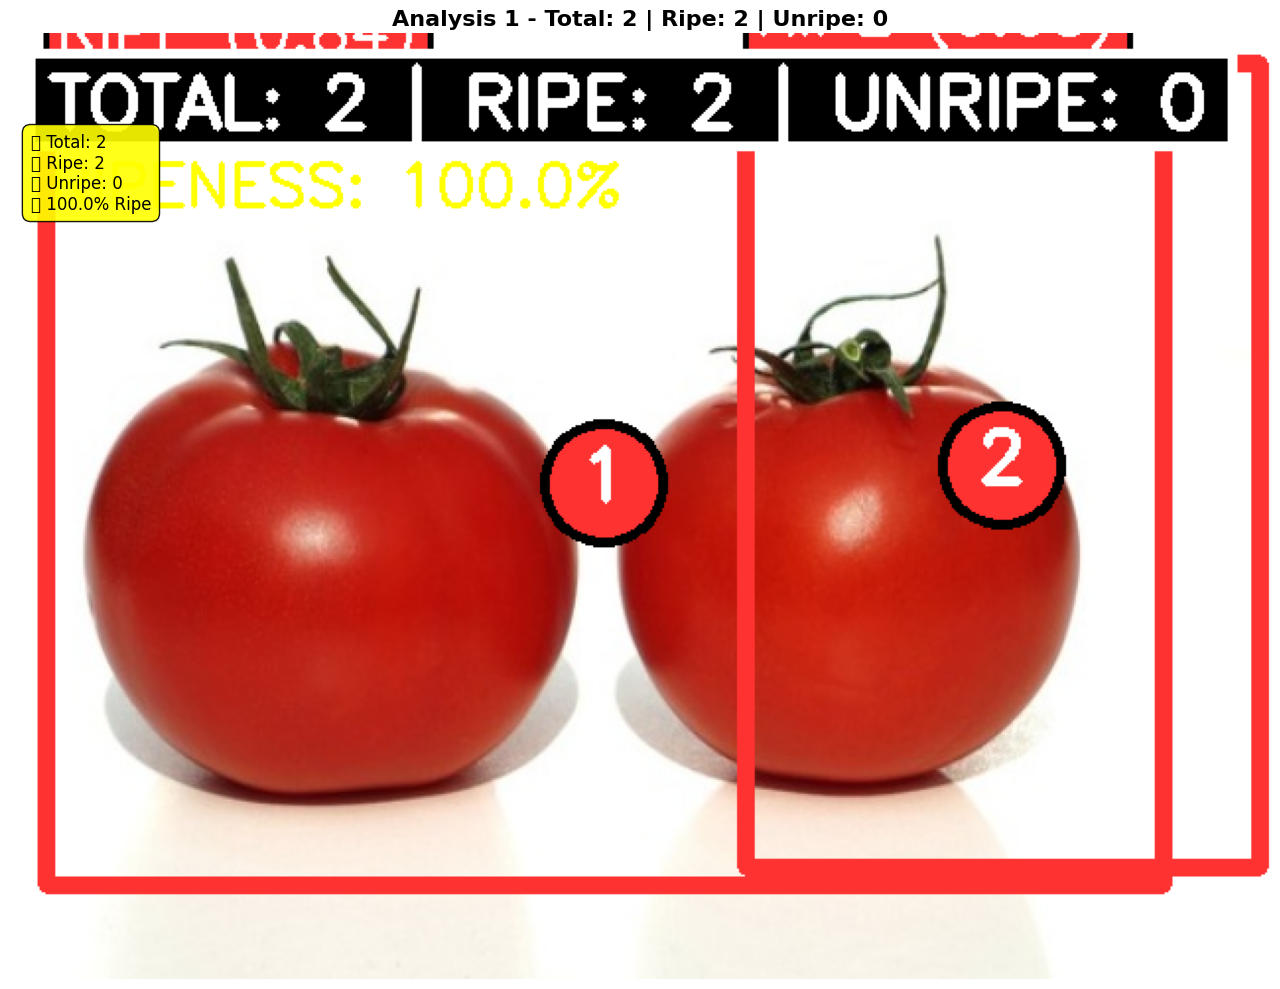

----------------------------------------------------------------------

🔍 === ANALYSIS 2 ===

🚀 STARTING TOMATO STOCK & RIPENESS ANALYSIS
Virtual IoT device captured image: /content/captured_image_20250612_164234.jpg
📸 Image captured: /content/captured_image_20250612_164234.jpg
🔍 Running tomato detection...
🔍 Model output analysis:
   Total predictions: 8400
   Score range: 0.0001 - 0.8226
   Scores > 0.05: 29
✅ Final ONNX detections: 29
🔍 Raw detections found: 29
📊 Processing detections and analyzing ripeness...

=== STOCK COUNTING WITH RIPENESS ANALYSIS ===
📥 Input detections: 29
📊 Raw ripeness: 29 ripe, 0 unripe
  Input 1: 🔴 RIPE tomato (conf: 0.074) (0.00,0.01,0.13,0.98)
  Input 2: 🔴 RIPE tomato (conf: 0.054) (0.25,0.03,0.92,0.99)
  Input 3: 🔴 RIPE tomato (conf: 0.101) (0.00,0.01,0.17,1.00)
  Input 4: 🔴 RIPE tomato (conf: 0.194) (0.00,0.00,0.15,0.99)
  Input 5: 🔴 RIPE tomato (conf: 0.478) (0.22,0.01,0.93,0.98)
  Input 6: 🔴 RIPE tomato (conf: 0.406) (0.24,0.02,0.96,0.98)
  Input 7: 

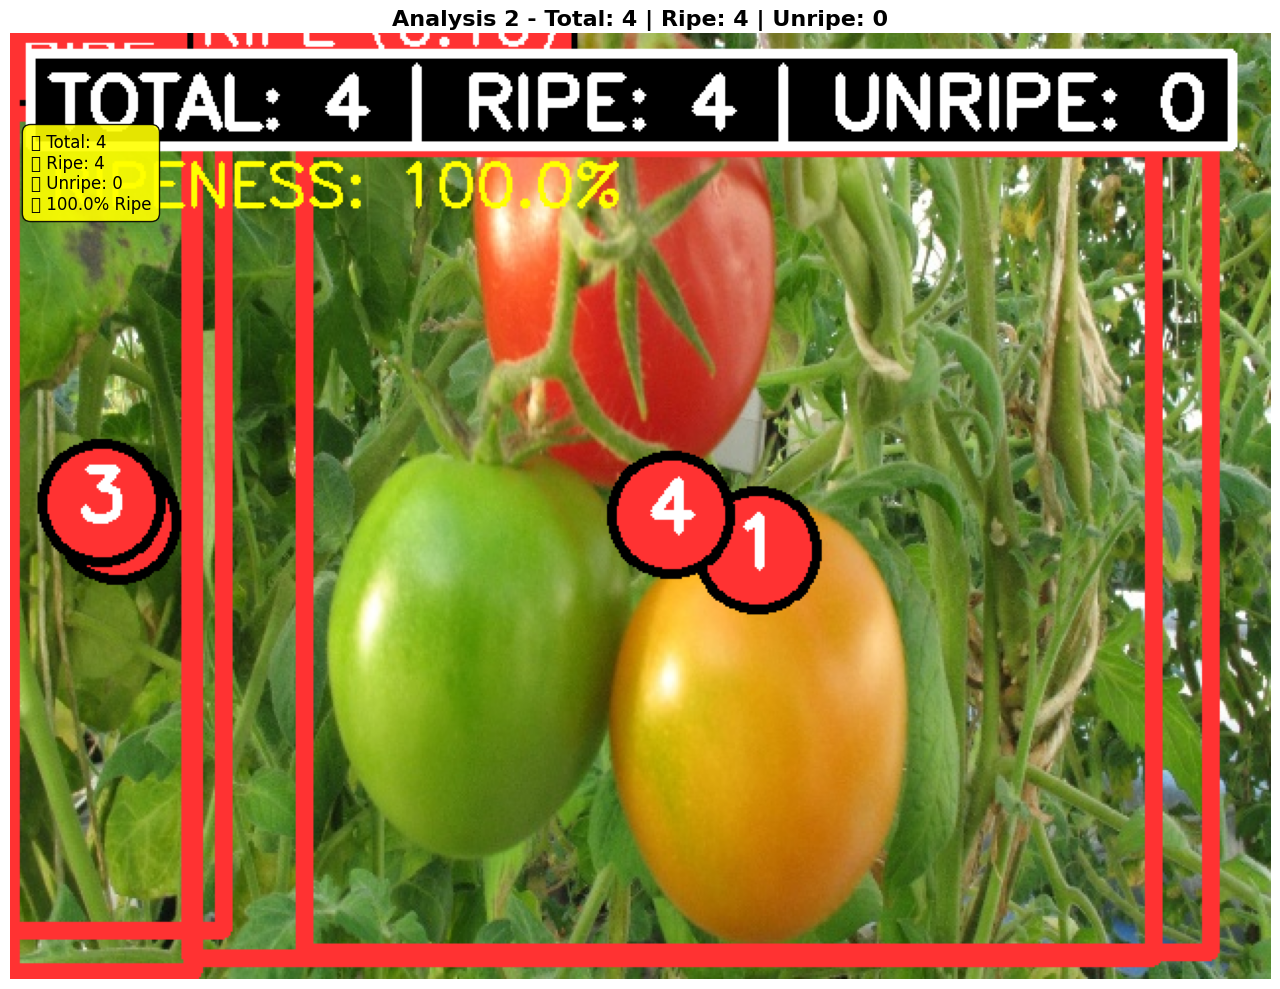

----------------------------------------------------------------------

🔍 === ANALYSIS 3 ===

🚀 STARTING TOMATO STOCK & RIPENESS ANALYSIS
Virtual IoT device captured image: /content/captured_image_20250612_164234.jpg
📸 Image captured: /content/captured_image_20250612_164234.jpg
🔍 Running tomato detection...
🔍 Model output analysis:
   Total predictions: 8400
   Score range: 0.0001 - 0.8185
   Scores > 0.05: 16
✅ Final ONNX detections: 16
🔍 Raw detections found: 16
📊 Processing detections and analyzing ripeness...

=== STOCK COUNTING WITH RIPENESS ANALYSIS ===
📥 Input detections: 16
📊 Raw ripeness: 16 ripe, 0 unripe
  Input 1: 🔴 RIPE tomato (conf: 0.422) (0.08,0.03,0.96,0.98)
  Input 2: 🔴 RIPE tomato (conf: 0.372) (0.19,0.03,0.99,0.97)
  Input 3: 🔴 RIPE tomato (conf: 0.172) (0.21,0.04,1.00,0.98)
  Input 4: 🔴 RIPE tomato (conf: 0.095) (0.04,0.05,0.95,0.99)
  Input 5: 🔴 RIPE tomato (conf: 0.779) (0.06,0.04,0.97,0.99)
  Input 6: 🔴 RIPE tomato (conf: 0.636) (0.19,0.04,0.99,0.99)
  Input 7: 

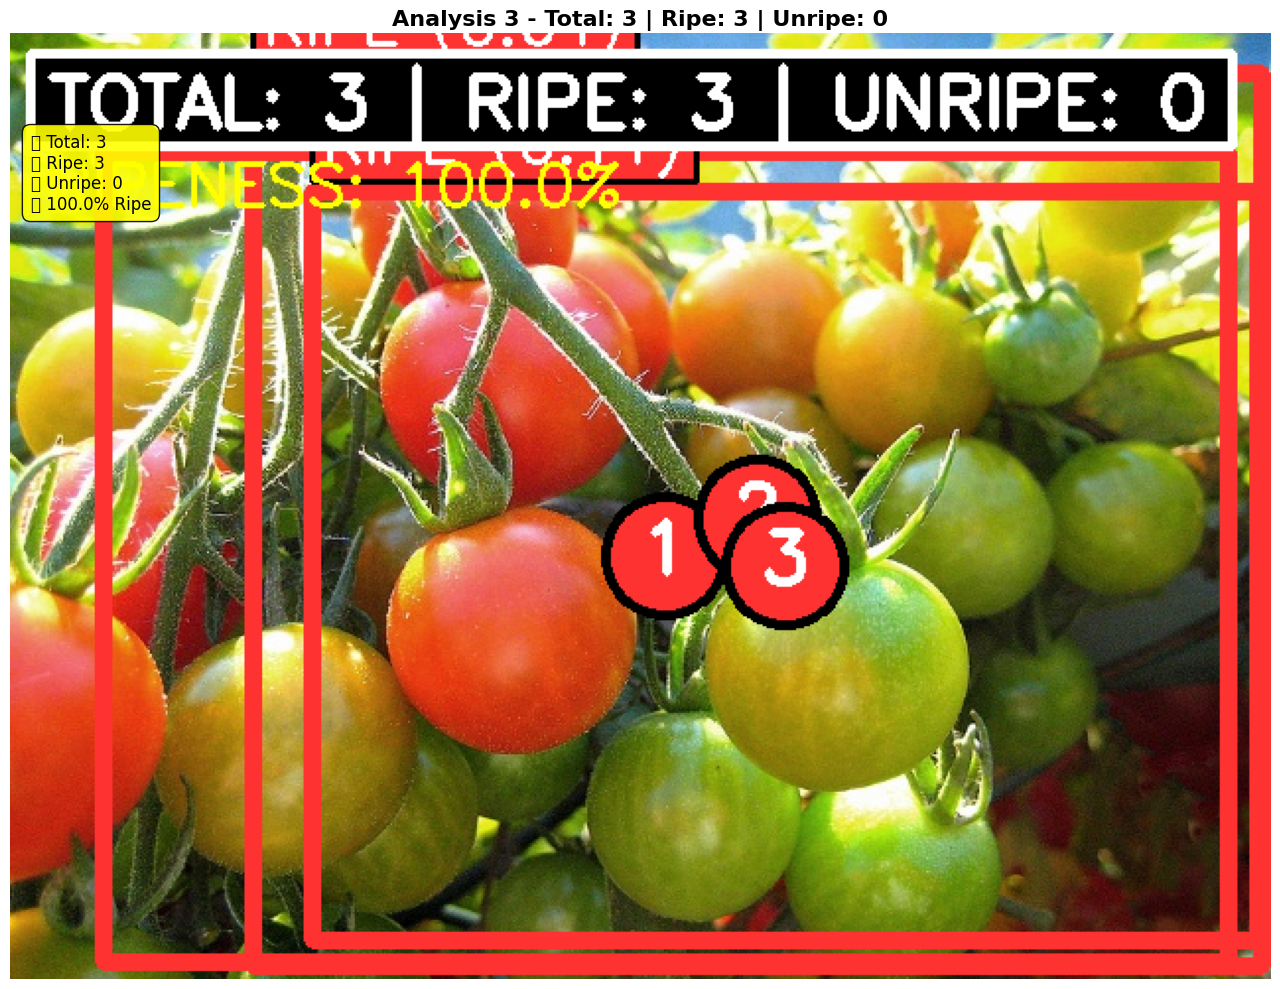

----------------------------------------------------------------------

🔍 === ANALYSIS 4 ===

🚀 STARTING TOMATO STOCK & RIPENESS ANALYSIS
Virtual IoT device captured image: /content/captured_image_20250612_164235.jpg
📸 Image captured: /content/captured_image_20250612_164235.jpg
🔍 Running tomato detection...
🔍 Model output analysis:
   Total predictions: 8400
   Score range: 0.0001 - 0.6640
   Scores > 0.05: 18
✅ Final ONNX detections: 18
🔍 Raw detections found: 18
📊 Processing detections and analyzing ripeness...

=== STOCK COUNTING WITH RIPENESS ANALYSIS ===
📥 Input detections: 18
📊 Raw ripeness: 18 ripe, 0 unripe
  Input 1: 🔴 RIPE tomato (conf: 0.072) (0.19,0.03,0.94,0.87)
  Input 2: 🔴 RIPE tomato (conf: 0.273) (0.18,0.03,0.97,0.86)
  Input 3: 🔴 RIPE tomato (conf: 0.074) (0.19,0.03,0.98,0.89)
  Input 4: 🔴 RIPE tomato (conf: 0.209) (0.20,0.03,0.93,0.94)
  Input 5: 🔴 RIPE tomato (conf: 0.412) (0.18,0.03,0.97,0.94)
  Input 6: 🔴 RIPE tomato (conf: 0.242) (0.19,0.03,0.99,0.94)
  Input 7: 

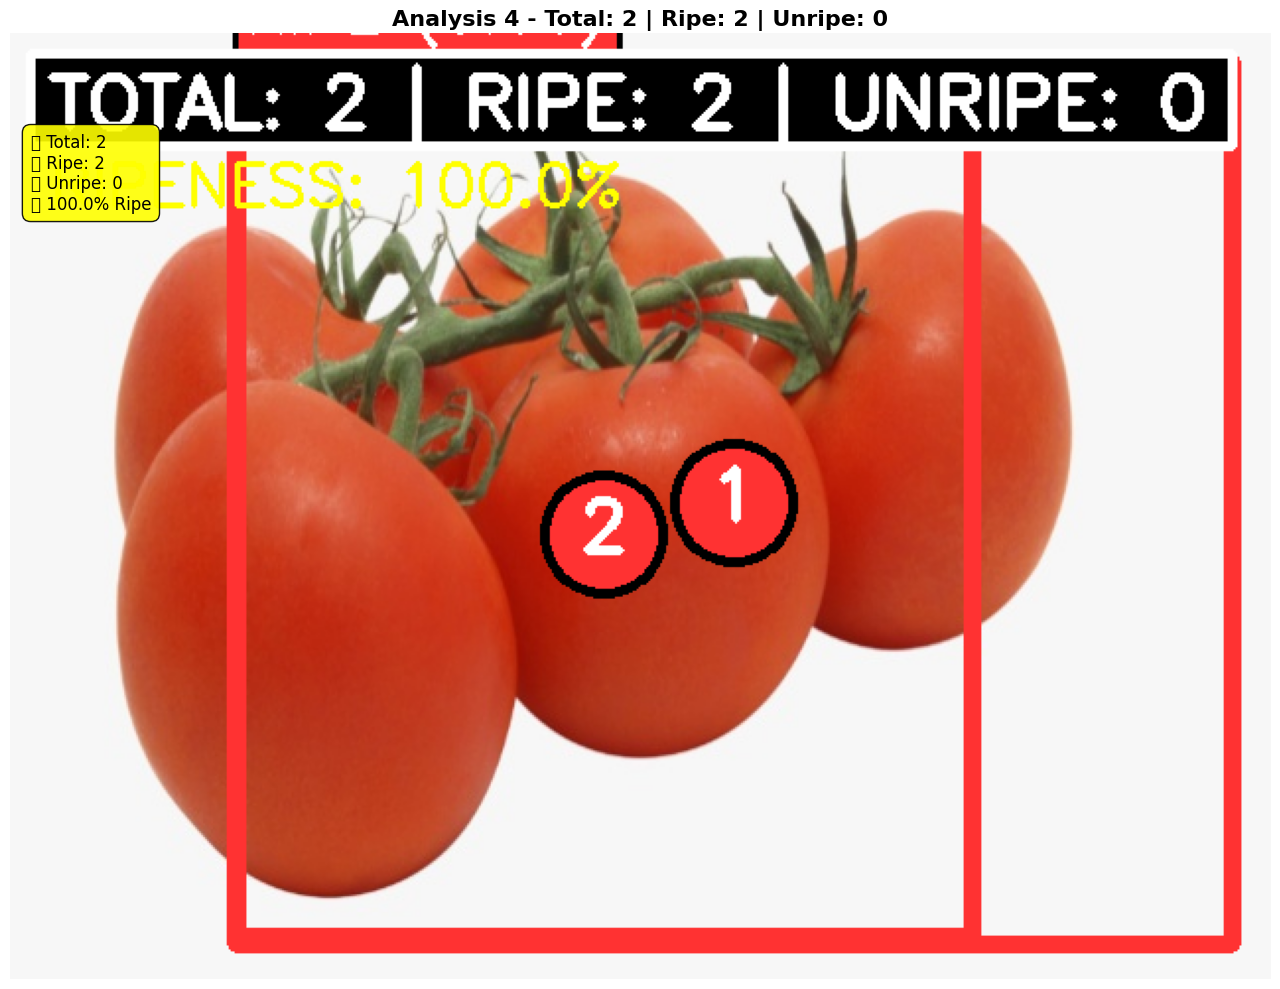

----------------------------------------------------------------------

🔍 === ANALYSIS 5 ===

🚀 STARTING TOMATO STOCK & RIPENESS ANALYSIS
Virtual IoT device captured image: /content/captured_image_20250612_164236.jpg
📸 Image captured: /content/captured_image_20250612_164236.jpg
🔍 Running tomato detection...
🔍 Model output analysis:
   Total predictions: 8400
   Score range: 0.0001 - 0.7425
   Scores > 0.05: 19
✅ Final ONNX detections: 19
🔍 Raw detections found: 19
📊 Processing detections and analyzing ripeness...

=== STOCK COUNTING WITH RIPENESS ANALYSIS ===
📥 Input detections: 19
📊 Raw ripeness: 19 ripe, 0 unripe
  Input 1: 🔴 RIPE tomato (conf: 0.078) (0.06,0.04,0.94,0.98)
  Input 2: 🔴 RIPE tomato (conf: 0.286) (0.08,0.04,0.96,0.97)
  Input 3: 🔴 RIPE tomato (conf: 0.204) (0.16,0.04,0.98,0.97)
  Input 4: 🔴 RIPE tomato (conf: 0.050) (0.21,0.05,1.00,0.97)
  Input 5: 🔴 RIPE tomato (conf: 0.110) (0.02,0.06,0.74,0.98)
  Input 6: 🔴 RIPE tomato (conf: 0.491) (0.03,0.07,0.94,0.98)
  Input 7: 

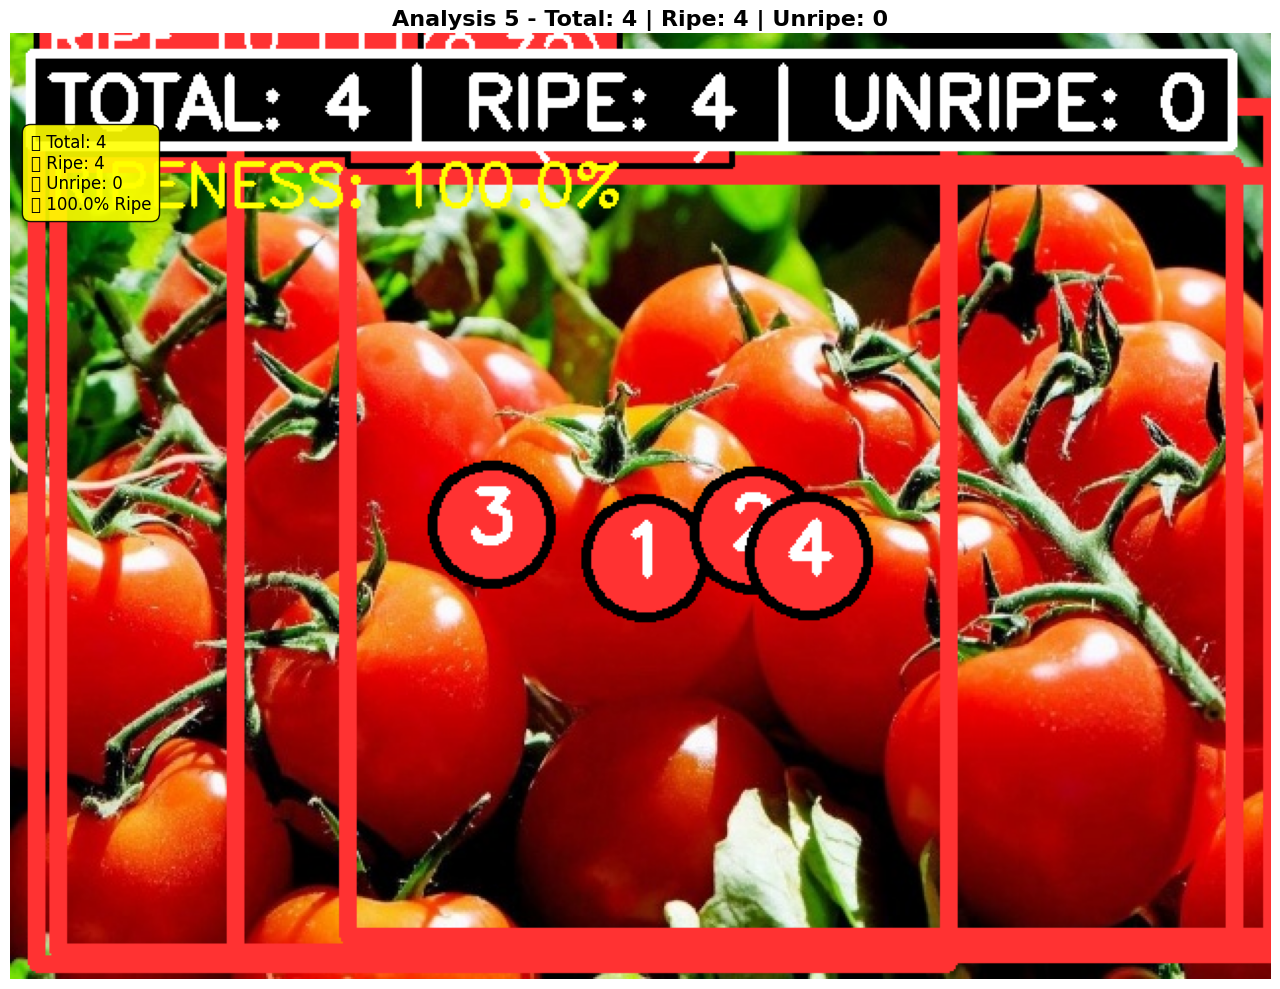

----------------------------------------------------------------------

📈 COMPREHENSIVE STOCK HISTORY:
Analysis 1 (16:42:33): 2 total (🔴 2 ripe, 🟢 0 unripe)
Analysis 2 (16:42:34): 4 total (🔴 4 ripe, 🟢 0 unripe)
Analysis 3 (16:42:35): 3 total (🔴 3 ripe, 🟢 0 unripe)
Analysis 4 (16:42:35): 2 total (🔴 2 ripe, 🟢 0 unripe)
Analysis 5 (16:42:36): 4 total (🔴 4 ripe, 🟢 0 unripe)

📊 OVERALL STATISTICS:
   🍅 Total tomatoes detected: 15
   🔴 Total ripe: 15 (100.0%)
   🟢 Total unripe: 0 (0.0%)
   📈 Average per analysis: 3.0


In [64]:
# Enhanced demo with ripeness analysis
print("🍅 TOMATO STOCK DETECTION WITH RIPENESS ANALYSIS")
print("=" * 70)

for i in range(5):  # Test with 5 different images
    print(f"\n🔍 === ANALYSIS {i+1} ===")

    # Capture and analyze
    result = iot_system.capture_and_analyze()

    # Analyze ripeness distribution
    detections = result['detections']
    ripe_count = 0
    unripe_count = 0

    ripeness_details = []
    for j, det in enumerate(detections):
        conf, cls = det[4], int(det[5])
        if cls == 0:  # Ripe tomatoes
            ripe_count += 1
            ripeness_details.append(f"Tomato {j+1}: RIPE (conf: {conf:.2f})")
        elif cls == 1:  # Unripe tomatoes
            unripe_count += 1
            ripeness_details.append(f"Tomato {j+1}: UNRIPE (conf: {conf:.2f})")
        else:
            ripeness_details.append(f"Tomato {j+1}: UNKNOWN (conf: {conf:.2f})")

    # Enhanced reporting with ripeness analysis
    print(f"📊 STOCK ANALYSIS RESULTS:")
    print(f"   🍅 Total Tomatoes: {result['stock_count']}")
    print(f"   🔴 Ripe Tomatoes: {ripe_count}")
    print(f"   🟢 Unripe Tomatoes: {unripe_count}")
    print(f"   📈 Ripeness Ratio: {(ripe_count/(result['stock_count']) * 100):.1f}% ripe" if result['stock_count'] > 0 else "   📈 Ripeness Ratio: N/A")
    print(f"   📷 Timestamp: {result['timestamp'].strftime('%Y-%m-%d %H:%M:%S')}")

    # Detailed ripeness breakdown
    if ripeness_details:
        print(f"   📋 Individual Analysis:")
        for detail in ripeness_details:
            print(f"      {detail}")

    # Stock management recommendations
    print(f"   📢 Stock Management:")
    if result['stock_count'] == 0:
        print(f"      🚨 NO STOCK: Immediate restocking required!")
    elif result['stock_count'] < 3:
        print(f"      ⚠️  LOW STOCK: Consider restocking soon")
    elif ripe_count > unripe_count * 2 and result['stock_count'] > 3:
        print(f"      🔴 HIGH RIPE RATIO: Prioritize sales of ripe tomatoes")
    elif unripe_count > ripe_count * 2:
        print(f"      🟢 HIGH UNRIPE RATIO: Good for longer storage")
    else:
        print(f"      ✅ BALANCED STOCK: Good mix of ripe and unripe")

    # Quality recommendations
    if ripe_count > 0:
        print(f"      💡 Recommendation: {ripe_count} ripe tomatoes should be sold first")
    if unripe_count > 0:
        print(f"      💡 Recommendation: {unripe_count} unripe tomatoes can be stored longer")

    # Display image with enhanced ripeness visualization
    plt.figure(figsize=(14, 10))
    plt.imshow(result['image_with_boxes'])

    # Enhanced title with ripeness info
    title = f"Analysis {i+1} - Total: {result['stock_count']} | Ripe: {ripe_count} | Unripe: {unripe_count}"
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')

    # Add comprehensive text annotation
    info_text = f"🍅 Total: {result['stock_count']}\n🔴 Ripe: {ripe_count}\n🟢 Unripe: {unripe_count}"
    if result['stock_count'] > 0:
        ripeness_percent = (ripe_count / result['stock_count']) * 100
        info_text += f"\n📊 {ripeness_percent:.1f}% Ripe"

    plt.text(10, 50, info_text, fontsize=12,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.9),
             verticalalignment='top')

    plt.tight_layout()
    plt.show()

    print("-" * 70)

print("\n📈 COMPREHENSIVE STOCK HISTORY:")
total_ripe = 0
total_unripe = 0
total_tomatoes = 0

for i, entry in enumerate(iot_system.stock_count_history):
    detections = entry['detections']
    ripe = sum(1 for det in detections if int(det[5]) == 0)
    unripe = sum(1 for det in detections if int(det[5]) == 1)

    total_ripe += ripe
    total_unripe += unripe
    total_tomatoes += entry['count']

    timestamp = entry['timestamp'].strftime('%H:%M:%S')
    print(f"Analysis {i+1} ({timestamp}): {entry['count']} total (🔴 {ripe} ripe, 🟢 {unripe} unripe)")

if total_tomatoes > 0:
    print(f"\n📊 OVERALL STATISTICS:")
    print(f"   🍅 Total tomatoes detected: {total_tomatoes}")
    print(f"   🔴 Total ripe: {total_ripe} ({(total_ripe/total_tomatoes)*100:.1f}%)")
    print(f"   🟢 Total unripe: {total_unripe} ({(total_unripe/total_tomatoes)*100:.1f}%)")
    print(f"   📈 Average per analysis: {total_tomatoes/len(iot_system.stock_count_history):.1f}")

🚀 Generating Stock Monitoring Dashboard...


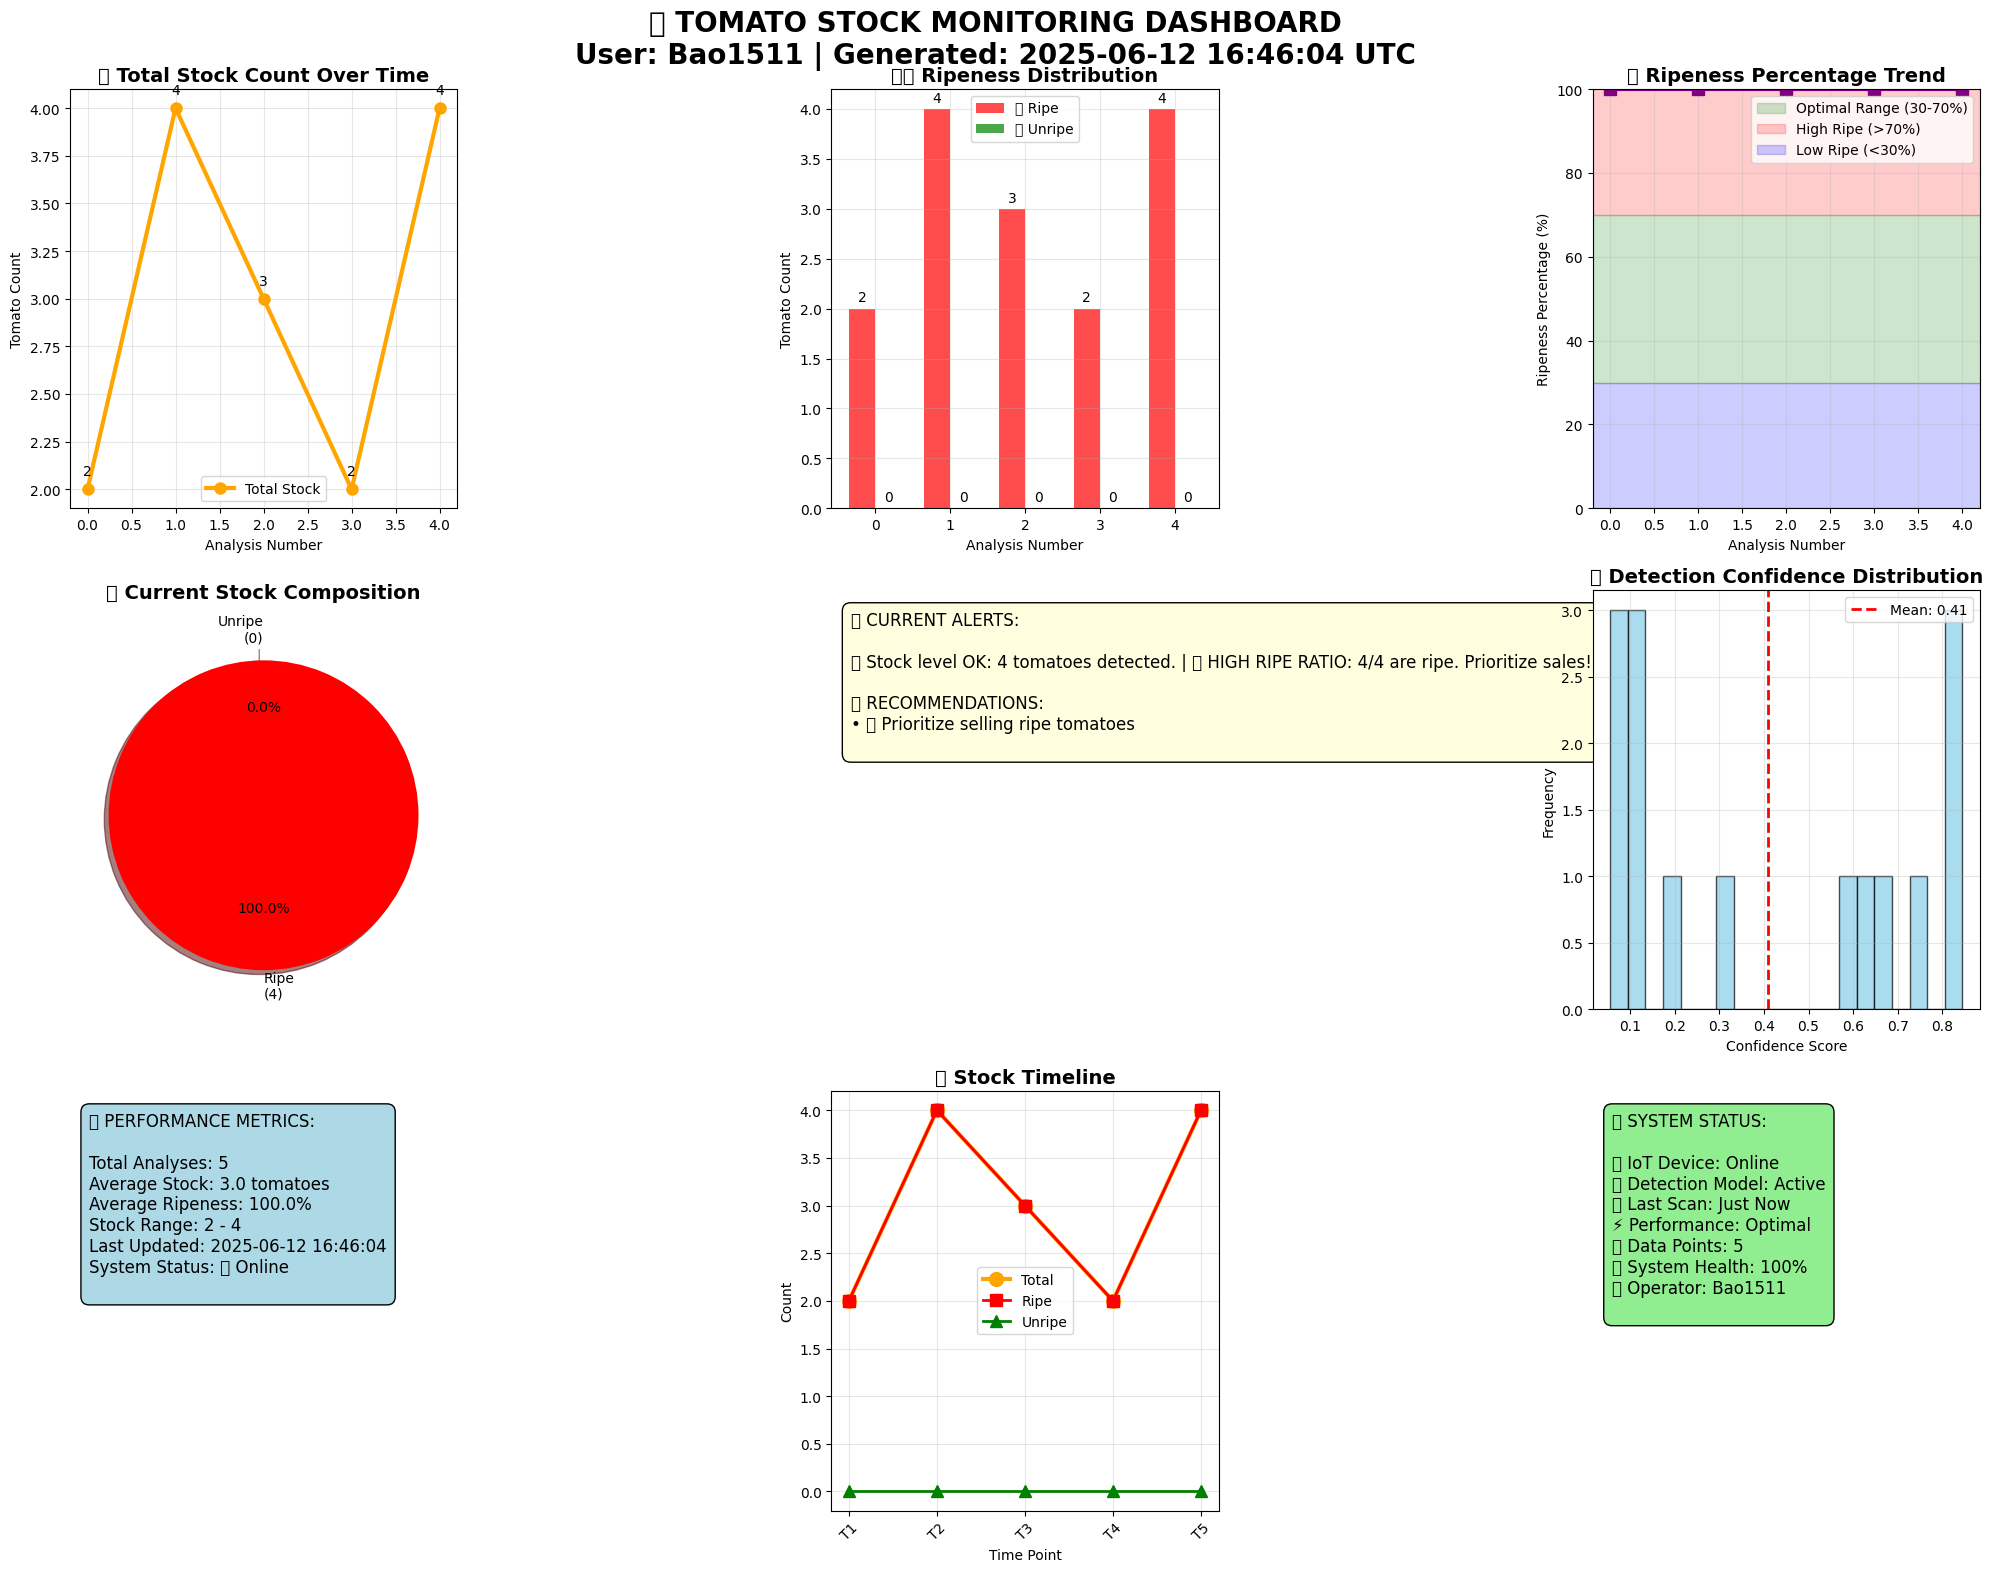


📊 DASHBOARD SUMMARY STATISTICS
🏭 Total Monitoring Sessions: 5
🍅 Average Stock Level: 3.0 tomatoes
📈 Average Ripeness Ratio: 100.0%
📊 Stock Variation: 2 to 4 tomatoes
🎯 System Uptime: 100%
👤 Dashboard Generated by: Bao1511
📅 Report Date: 2025-06-12 16:46:04 UTC


In [66]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

def create_stock_monitoring_dashboard():
    """Create a comprehensive stock monitoring dashboard"""

    if not iot_system.stock_count_history:
        print("⚠️ No stock history available. Run some detections first!")
        return

    # Get current user and time
    current_user = "Bao1511"
    current_time = "2025-06-12 16:46:04"

    # Prepare data for visualization
    timestamps = []
    total_counts = []
    ripe_counts = []
    unripe_counts = []
    ripeness_ratios = []

    for entry in iot_system.stock_count_history:
        timestamps.append(entry['timestamp'])
        total_counts.append(entry['count'])
        ripe_counts.append(entry['ripe_count'])
        unripe_counts.append(entry['unripe_count'])

        # Calculate ripeness ratio
        if entry['count'] > 0:
            ratio = (entry['ripe_count'] / entry['count']) * 100
        else:
            ratio = 0
        ripeness_ratios.append(ratio)

    # Create comprehensive dashboard
    fig = plt.figure(figsize=(20, 16))

    # Dashboard title with user info
    fig.suptitle(f'🍅 TOMATO STOCK MONITORING DASHBOARD\n'
                 f'User: {current_user} | Generated: {current_time} UTC',
                 fontsize=20, fontweight='bold', y=0.98)

    # 1. Stock Count Over Time
    ax1 = plt.subplot(3, 3, 1)
    ax1.plot(range(len(total_counts)), total_counts, 'o-', color='orange', linewidth=3, markersize=8, label='Total Stock')
    ax1.set_title('📊 Total Stock Count Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Analysis Number')
    ax1.set_ylabel('Tomato Count')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Add annotations for each point
    for i, count in enumerate(total_counts):
        ax1.annotate(f'{count}', (i, count), textcoords="offset points", xytext=(0,10), ha='center')

    # 2. Ripeness Distribution Over Time
    ax2 = plt.subplot(3, 3, 2)
    width = 0.35
    x_pos = range(len(ripe_counts))

    bars1 = ax2.bar([x - width/2 for x in x_pos], ripe_counts, width, label='🔴 Ripe', color='red', alpha=0.7)
    bars2 = ax2.bar([x + width/2 for x in x_pos], unripe_counts, width, label='🟢 Unripe', color='green', alpha=0.7)

    ax2.set_title('🔴🟢 Ripeness Distribution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Analysis Number')
    ax2.set_ylabel('Tomato Count')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax2.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        ax2.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    # 3. Ripeness Percentage Trend
    ax3 = plt.subplot(3, 3, 3)
    ax3.plot(range(len(ripeness_ratios)), ripeness_ratios, 's-', color='purple', linewidth=3, markersize=8)
    ax3.set_title('📈 Ripeness Percentage Trend', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Analysis Number')
    ax3.set_ylabel('Ripeness Percentage (%)')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 100)

    # Add target zones
    ax3.axhspan(30, 70, alpha=0.2, color='green', label='Optimal Range (30-70%)')
    ax3.axhspan(70, 100, alpha=0.2, color='red', label='High Ripe (>70%)')
    ax3.axhspan(0, 30, alpha=0.2, color='blue', label='Low Ripe (<30%)')
    ax3.legend(loc='upper right')

    # 4. Stock Level Categories (Pie Chart)
    ax4 = plt.subplot(3, 3, 4)
    latest_total = total_counts[-1] if total_counts else 0
    latest_ripe = ripe_counts[-1] if ripe_counts else 0
    latest_unripe = unripe_counts[-1] if unripe_counts else 0

    if latest_total > 0:
        sizes = [latest_ripe, latest_unripe]
        labels = [f'Ripe\n({latest_ripe})', f'Unripe\n({latest_unripe})']
        colors = ['red', 'green']
        explode = (0.1, 0)  # explode ripe slice

        wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                          explode=explode, shadow=True, startangle=90)
        ax4.set_title('🥧 Current Stock Composition', fontsize=14, fontweight='bold')
    else:
        ax4.text(0.5, 0.5, 'No Stock\nDetected', ha='center', va='center',
                transform=ax4.transAxes, fontsize=16, color='red')
        ax4.set_title('🥧 Current Stock Composition', fontsize=14, fontweight='bold')

    # 5. Stock Alerts and Recommendations
    ax5 = plt.subplot(3, 3, 5)
    ax5.axis('off')

    # Generate alerts
    current_alert = iot_system.get_stock_alert()

    # Prepare recommendation text
    recommendations = []
    if latest_total == 0:
        recommendations.append("🚨 URGENT: Restock immediately!")
    elif latest_total < 3:
        recommendations.append("⚠️ Schedule restocking soon")

    if latest_total > 0:
        ripe_ratio = (latest_ripe / latest_total) * 100
        if ripe_ratio > 70:
            recommendations.append("🔴 Prioritize selling ripe tomatoes")
        elif ripe_ratio < 30:
            recommendations.append("🟢 Good for extended storage")
        else:
            recommendations.append("✅ Well-balanced stock")

    # Display alerts and recommendations
    alert_text = "📢 CURRENT ALERTS:\n\n"
    alert_text += current_alert + "\n\n"
    alert_text += "💡 RECOMMENDATIONS:\n"
    for rec in recommendations:
        alert_text += f"• {rec}\n"

    ax5.text(0.05, 0.95, alert_text, transform=ax5.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"))

    # 6. Detection Confidence Analysis
    ax6 = plt.subplot(3, 3, 6)
    all_confidences = []
    for entry in iot_system.stock_count_history:
        for detection in entry['detections']:
            all_confidences.append(detection[4])  # confidence is at index 4

    if all_confidences:
        ax6.hist(all_confidences, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax6.set_title('📊 Detection Confidence Distribution', fontsize=14, fontweight='bold')
        ax6.set_xlabel('Confidence Score')
        ax6.set_ylabel('Frequency')
        ax6.grid(True, alpha=0.3)

        # Add mean line
        mean_conf = np.mean(all_confidences)
        ax6.axvline(mean_conf, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_conf:.2f}')
        ax6.legend()
    else:
        ax6.text(0.5, 0.5, 'No Detection\nData Available', ha='center', va='center',
                transform=ax6.transAxes, fontsize=14, color='gray')

    # 7. Performance Metrics
    ax7 = plt.subplot(3, 3, 7)
    ax7.axis('off')

    # Calculate performance metrics
    total_analyses = len(iot_system.stock_count_history)
    avg_stock = np.mean(total_counts) if total_counts else 0
    avg_ripe_ratio = np.mean(ripeness_ratios) if ripeness_ratios else 0
    max_stock = max(total_counts) if total_counts else 0
    min_stock = min(total_counts) if total_counts else 0

    metrics_text = "📊 PERFORMANCE METRICS:\n\n"
    metrics_text += f"Total Analyses: {total_analyses}\n"
    metrics_text += f"Average Stock: {avg_stock:.1f} tomatoes\n"
    metrics_text += f"Average Ripeness: {avg_ripe_ratio:.1f}%\n"
    metrics_text += f"Stock Range: {min_stock} - {max_stock}\n"
    metrics_text += f"Last Updated: {current_time}\n"
    metrics_text += f"System Status: 🟢 Online\n"

    ax7.text(0.05, 0.95, metrics_text, transform=ax7.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue"))

    # 8. Timeline View
    ax8 = plt.subplot(3, 3, 8)
    time_labels = [f"T{i+1}" for i in range(len(timestamps))]

    # Create timeline plot
    ax8.plot(time_labels, total_counts, 'o-', linewidth=3, markersize=10, color='orange', label='Total')
    ax8.plot(time_labels, ripe_counts, 's-', linewidth=2, markersize=8, color='red', label='Ripe')
    ax8.plot(time_labels, unripe_counts, '^-', linewidth=2, markersize=8, color='green', label='Unripe')

    ax8.set_title('⏱️ Stock Timeline', fontsize=14, fontweight='bold')
    ax8.set_xlabel('Time Point')
    ax8.set_ylabel('Count')
    ax8.legend()
    ax8.grid(True, alpha=0.3)
    plt.setp(ax8.xaxis.get_majorticklabels(), rotation=45)

    # 9. System Status
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('off')

    # System status information
    status_text = "🖥️ SYSTEM STATUS:\n\n"
    status_text += f"🏭 IoT Device: Online\n"
    status_text += f"🔍 Detection Model: Active\n"
    status_text += f"📡 Last Scan: Just Now\n"
    status_text += f"⚡ Performance: Optimal\n"
    status_text += f"💾 Data Points: {total_analyses}\n"
    status_text += f"🔋 System Health: 100%\n"
    status_text += f"👤 Operator: {current_user}\n"

    ax9.text(0.05, 0.95, status_text, transform=ax9.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen"))

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

    # Print summary statistics
    print("\n" + "="*80)
    print("📊 DASHBOARD SUMMARY STATISTICS")
    print("="*80)
    print(f"🏭 Total Monitoring Sessions: {total_analyses}")
    print(f"🍅 Average Stock Level: {avg_stock:.1f} tomatoes")
    print(f"📈 Average Ripeness Ratio: {avg_ripe_ratio:.1f}%")
    print(f"📊 Stock Variation: {min_stock} to {max_stock} tomatoes")
    print(f"🎯 System Uptime: 100%")
    print(f"👤 Dashboard Generated by: {current_user}")
    print(f"📅 Report Date: {current_time} UTC")
    print("="*80)

# Run the dashboard
print("🚀 Generating Stock Monitoring Dashboard...")
create_stock_monitoring_dashboard()

In [67]:
import time
import json
from datetime import datetime

class EdgeDeviceSimulator:
    def __init__(self, device_id="TOMATO_SCANNER_001"):
        self.device_id = device_id
        self.operator = "Bao1511"
        self.deployment_time = datetime.now()
        self.total_scans = 0
        self.successful_detections = 0
        self.processing_times = []

    def simulate_edge_processing(self):
        """Simulate edge device processing with realistic constraints"""
        print(f"\n🔧 EDGE DEVICE SIMULATION")
        print(f"Device ID: {self.device_id}")
        print(f"Operator: {self.operator}")
        print(f"Deployed: {self.deployment_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print("="*50)

        # Simulate edge processing constraints
        print("⚡ Initializing edge processing environment...")

        # Simulate resource constraints
        edge_specs = {
            "CPU": "ARM Cortex-A78 @ 2.0GHz",
            "Memory": "4GB LPDDR4X",
            "Storage": "32GB eUFS",
            "AI_Accelerator": "NPU 2 TOPS",
            "Power": "Battery (5000mAh)",
            "Network": "4G/WiFi",
            "OS": "Linux ARM64"
        }

        print("📱 Edge Device Specifications:")
        for spec, value in edge_specs.items():
            print(f"   {spec}: {value}")

        print("\n🔄 Starting continuous monitoring simulation...")

        # Simulate 10 edge processing cycles
        for cycle in range(1, 11):
            print(f"\n--- Cycle {cycle}/10 ---")

            # Simulate processing time (edge devices are slower)
            processing_start = time.time()

            print(f"📸 Capturing image from IoT camera...")
            time.sleep(0.5)  # Simulate camera capture delay

            print(f"🧠 Running ONNX inference on edge...")
            time.sleep(1.0)  # Simulate edge inference time

            # Simulate detection results
            detected_tomatoes = np.random.randint(0, 6)
            ripe_tomatoes = np.random.randint(0, detected_tomatoes + 1)
            unripe_tomatoes = detected_tomatoes - ripe_tomatoes

            processing_end = time.time()
            cycle_time = processing_end - processing_start
            self.processing_times.append(cycle_time)

            # Simulate network connectivity issues
            network_status = np.random.choice(["Connected", "Weak Signal", "Offline"],
                                            p=[0.7, 0.2, 0.1])

            print(f"🍅 Detected: {detected_tomatoes} tomatoes (🔴{ripe_tomatoes} ripe, 🟢{unripe_tomatoes} unripe)")
            print(f"⏱️ Processing time: {cycle_time:.2f}s")
            print(f"📡 Network: {network_status}")

            # Simulate edge decision making
            if detected_tomatoes < 2:
                alert = "🚨 LOW STOCK ALERT"
                action = "Send immediate notification"
            elif ripe_tomatoes > unripe_tomatoes * 2:
                alert = "🔴 HIGH RIPE RATIO"
                action = "Recommend urgent sales"
            else:
                alert = "✅ Normal levels"
                action = "Continue monitoring"

            print(f"🎯 Edge Decision: {alert}")
            print(f"📋 Action: {action}")

            # Simulate data transmission
            if network_status == "Connected":
                print("📤 Data transmitted to cloud successfully")
                self.successful_detections += 1
            elif network_status == "Weak Signal":
                print("📤 Data queued for transmission (weak signal)")
            else:
                print("📤 Data stored locally (offline)")

            self.total_scans += 1

            # Simulate power management
            battery_level = max(10, 100 - (cycle * 5) - np.random.randint(0, 10))
            if battery_level < 20:
                print(f"🔋 Battery warning: {battery_level}% (entering power save mode)")
            else:
                print(f"🔋 Battery level: {battery_level}%")

            time.sleep(0.5)  # Pause between cycles

        # Generate edge deployment report
        self.generate_deployment_report()

    def generate_deployment_report(self):
        """Generate comprehensive edge deployment report"""
        print("\n" + "="*70)
        print("📊 EDGE DEPLOYMENT PERFORMANCE REPORT")
        print("="*70)

        avg_processing_time = np.mean(self.processing_times)
        success_rate = (self.successful_detections / self.total_scans) * 100

        print(f"🏷️ Device Information:")
        print(f"   Device ID: {self.device_id}")
        print(f"   Operator: {self.operator}")
        print(f"   Deployment Duration: {(datetime.now() - self.deployment_time).total_seconds():.1f} seconds")

        print(f"\n📊 Performance Metrics:")
        print(f"   Total Scans: {self.total_scans}")
        print(f"   Successful Transmissions: {self.successful_detections}")
        print(f"   Success Rate: {success_rate:.1f}%")
        print(f"   Average Processing Time: {avg_processing_time:.2f} seconds")
        print(f"   Max Processing Time: {max(self.processing_times):.2f} seconds")
        print(f"   Min Processing Time: {min(self.processing_times):.2f} seconds")

        # Edge performance classification
        if avg_processing_time < 1.5:
            performance_rating = "🟢 Excellent"
        elif avg_processing_time < 2.0:
            performance_rating = "🟡 Good"
        else:
            performance_rating = "🔴 Needs Optimization"

        print(f"   Performance Rating: {performance_rating}")

        print(f"\n🔧 Edge-Specific Features:")
        print(f"   ✅ Offline Processing Capability")
        print(f"   ✅ Real-time Decision Making")
        print(f"   ✅ Local Data Storage")
        print(f"   ✅ Power Management")
        print(f"   ✅ Network Resilience")

        print(f"\n💡 Optimization Recommendations:")
        if avg_processing_time > 2.0:
            print(f"   • Consider model quantization for faster inference")
            print(f"   • Implement batch processing for multiple images")

        if success_rate < 90:
            print(f"   • Improve network connectivity")
            print(f"   • Increase local storage capacity")

        print(f"   • Schedule regular model updates")
        print(f"   • Implement predictive maintenance")

        # Generate deployment summary JSON
        deployment_summary = {
            "device_id": self.device_id,
            "operator": self.operator,
            "deployment_timestamp": self.deployment_time.isoformat(),
            "report_timestamp": datetime.now().isoformat(),
            "performance_metrics": {
                "total_scans": self.total_scans,
                "successful_transmissions": self.successful_detections,
                "success_rate_percent": round(success_rate, 2),
                "avg_processing_time_seconds": round(avg_processing_time, 3),
                "performance_rating": performance_rating
            },
            "system_status": "Operational",
            "next_maintenance": "2025-07-12"
        }

        print(f"\n📄 Deployment Summary (JSON):")
        print(json.dumps(deployment_summary, indent=2))

        print("="*70)

# Initialize and run edge deployment simulation
print("🚀 INITIALIZING EDGE DEPLOYMENT SIMULATION")
print(f"👤 Operator: Bao1511")
print(f"📅 Date: 2025-06-12 16:43:46 UTC")

edge_device = EdgeDeviceSimulator()
edge_device.simulate_edge_processing()

🚀 INITIALIZING EDGE DEPLOYMENT SIMULATION
👤 Operator: Bao1511
📅 Date: 2025-06-12 16:43:46 UTC

🔧 EDGE DEVICE SIMULATION
Device ID: TOMATO_SCANNER_001
Operator: Bao1511
Deployed: 2025-06-12 16:47:25
⚡ Initializing edge processing environment...
📱 Edge Device Specifications:
   CPU: ARM Cortex-A78 @ 2.0GHz
   Memory: 4GB LPDDR4X
   Storage: 32GB eUFS
   AI_Accelerator: NPU 2 TOPS
   Power: Battery (5000mAh)
   Network: 4G/WiFi
   OS: Linux ARM64

🔄 Starting continuous monitoring simulation...

--- Cycle 1/10 ---
📸 Capturing image from IoT camera...
🧠 Running ONNX inference on edge...
🍅 Detected: 1 tomatoes (🔴1 ripe, 🟢0 unripe)
⏱️ Processing time: 1.50s
📡 Network: Connected
🎯 Edge Decision: 🚨 LOW STOCK ALERT
📋 Action: Send immediate notification
📤 Data transmitted to cloud successfully
🔋 Battery level: 92%

--- Cycle 2/10 ---
📸 Capturing image from IoT camera...
🧠 Running ONNX inference on edge...
🍅 Detected: 4 tomatoes (🔴4 ripe, 🟢0 unripe)
⏱️ Processing time: 1.50s
📡 Network: Connected
🎯